<h2> OVERVIEW OF PROBLEM



1. 	An asteroid is a minor planet of the inner Solar System . They are metallic or rocky bodies without atmospheres. The size and shapes of asteroids vary significantly including even dwarf planets but not planets . The majority of known asteroids orbit within the asteroid belt between the orbits of Mars and Jupiter, generally in relatively low-eccentricity (i.e. not very elongated) orbits. Near-Earth asteroids, or NEAs, are asteroids that have orbits that pass close to that of Earth. Asteroids that actually cross Earth's orbital path are known as Earth-crossers. As of April 2022, 28,772 near-Earth asteroids are known; 878 have a diameter of one kilometer or larger. There is increasing interest in identifying asteroids whose orbits cross Earth's, and that could, given enough time, collide with Earth. If a rocky meteoroid larger than 25 meters but smaller than one kilometer (a little more than 1/2 mile) were to hit Earth, it would likely cause local damage to the impact area. We believe anything larger than one to two kilometer (one kilometer is a little more than one-half mile) could have worldwide effects. Calculating diameter of a Asteroid is a complex task and in this case studies I will try to predict the diameter of as asteroid . Knowing diameter of an asteroid will help us to make proactive decision to tackle asteroids there are many asteroids deflection strategies either we can change path of the asteroids or make it collide with some projectile from earth to destroy it outside earth only.
2. I am using a dataset which is publicly available on Kaggle (https://www.kaggle.com/datasets/basu369victor/prediction-of-asteroid-diameter) this data is obtained by a user Victor Basu from https://ssd.jpl.nasa.gov/sbdb_query.cgi . It contains features of asteroid and will be predict diameter of asteroid



<h2> BUSINESS OBJECTIVE AND CONSTRAINT


1.   This is a regression problem in which we will try to maximize R2 score or minimize mean squared error
2.   There is no such latency requirement that we have to predict asteroid diameter in real time we can actually take some minutes to predict diameter of asteroids



In [ ]:
#I will be using google colab so i will run these commands which will get the dataset stored in my google drive and it will move it to the current runtime storage
#!pip install gdown
!gdown --id 15zNMCFPbE8IwBCzXabqsJDpCMNLKMBDM

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15zNMCFPbE8IwBCzXabqsJDpCMNLKMBDM
To: /content/Asteroid_Updated.csv
100% 201M/201M [00:01<00:00, 120MB/s]


# BASIC DATA EXPLORATION

In [ ]:
#importing basic libraries of python which will be used in data exploration as model building 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Loading dataset
asteroid=pd.read_csv('Asteroid_Updated.csv')

In [ ]:
#Looking at first 5 rows of dataset
asteroid.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [ ]:
print("Columns in dataset are",list(asteroid.columns))

Columns in dataset are ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']


In [ ]:
print("There are {} number of rows in dataset".format(asteroid.shape[0]))
print("There are {} number of columns in dataset".format(asteroid.shape[1]))

There are 839714 number of rows in dataset
There are 31 number of columns in dataset


In [ ]:
#We observe the output variable that is diameter of asteroid is empty in some rows 
print("Number of data points where output(diameter) is null {}".format(asteroid['diameter'].isnull().sum()))
print("Number of data points where output(diameter) is not null {}".format(asteroid['diameter'].notnull().sum()))

Number of data points where output(diameter) is null 702078
Number of data points where output(diameter) is not null 137636


In [ ]:
#Seeking into rows of data where diameter of asteroid is null
asteroid[asteroid['diameter'].isnull()].head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
681,Hagar,2.654040,0.171983,11.505647,190.799959,104.993824,2.197591,3.110489,4.323837,40313.0,...,NaN,NaN,NaN,NaN,NaN,1.215450,MBA,0.227952,1579.281370,134.457728
698,Hela,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,...,0.386,NaN,Sq,S,NaN,0.624487,MCA,0.233612,1541.019467,237.586385
718,Albert,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,...,NaN,NaN,S,NaN,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
729,Athanasia,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,...,NaN,NaN,NaN,NaN,NaN,0.841461,MBA,0.293329,1227.290668,295.120065
842,Nicolaia,2.279598,0.209766,7.997715,4.071354,316.957209,1.801415,2.757780,3.441878,37651.0,...,NaN,NaN,NaN,NaN,NaN,0.798230,MBA,0.286363,1257.146084,317.982712


<h3>There are many columns where column values are NAN (Missing values) i will deal that later but where diameter is Null we will delete those rows because neither it can be used to train the model neither it can be used to test.

In [ ]:
#Dropping those rows where diameter is null
asteroid=asteroid[asteroid['diameter'].notnull()]

In [ ]:
print(asteroid.shape)

(137636, 31)


There are total 137636 rows and 31 columns where 30 columns are independent columns and diameter being dependent column

<h6><b>Details of Some Columns<br></b>
name- Name of asteroids <br>
a - Semi major axis <br>
e-eccentricity <br>
i- inclination with respect to x-y elliptical plane <br>
om - longitude of the ascending node <br>
w- argument of perihelion<br>
q - perihelion distance<br>
ad - aphelion distance<br>
per_y - orbital period<br>
data_Arc - data arc span(d)<br>
condition_Code = orbit condition code<br>
n_obs_used - number of observation used<br>
H - absolute magnitude parameter<br>
neo-Near earth object<br>
pha - Physically hazardous object<br>
diameter - diameter of asteroids<br>
extent - Object bi/tri axial ellipsoid dimensions(Km)<br>
albedo - geometric albedo <br>
rot_per - rotation period<br>



<h2> TRAIN TEST AND VALIDATION SPLIT

In [ ]:
Y=asteroid[['diameter']]
X=asteroid.drop(['diameter'],axis=1)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [ ]:
print("Number of data points in training dataset are {}".format(X_train.shape[0]))
print("Number of data points in testing dataset are {}".format(X_test.shape[0]))

Number of data points in training dataset are 92216
Number of data points in testing dataset are 45420


In [ ]:
#For now i am combining both X_train and Y_Train into train and X_test and Y_test into test
train=pd.concat([X_train,Y_train],axis=1)
test=pd.concat([X_test,Y_test],axis=1)

<h2> Exploratory Data Analysis

<h3> Name 

International astronomical unit now regulates the naming of asteroid.it was initally named on based of classical mythology such as ceres,juno,pallas and vesta. Now names are no longer restricted to mythological characters . Names thus doesn't contain any information about diameter of asteroid thus we can drop name column.
Refeerence - https://www.open.edu/openlearn/science-maths-technology/science/physics-and-astronomy/astronomy/the-naming-asteroids

In [ ]:
#dropping name column as it doesn't contain any vital information
X_train=X_train.drop('name',axis=1)
X_test=X_test.drop('name',axis=1)

<h3> a - Semi major axis

Planetary motion according to Kepler's law follow elliptical path like radius in circle ellipse have two paramters to define its path semi major axis and semi minor axis . <br>
<br>
<br>
$\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1  $
<br>
<br>
Where a is semi major axis and b is semi minor axis .

In [ ]:
#Let's check if there is some missing values or not
print("Total number of missing values in semi major axis in training dataset is {}".format(X_train['a'].isnull().sum()))
print("Total number of missing values in semi major axis in testing dataset is {}".format(X_test['a'].isnull().sum()))

Total number of missing values in semi major axis in training dataset is 0
Total number of missing values in semi major axis in testing dataset is 0


In [ ]:
#Changing datatype of semi major axis as float because sometimes observer write in int sometime in float making it same in whole column
X_train['a']=X_train['a'].astype('float')
Y_train=Y_train.astype('float')
X_test['a']=X_test['a'].astype('float')
Y_test=Y_test.astype('float')

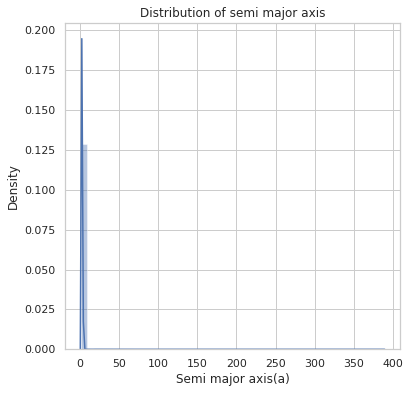

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['a'])
plt.xlabel("Semi major axis(a)")
plt.title("Distribution of semi major axis")
plt.show()

Text(0.5, 1.0, 'Boxplot of semi major axis')

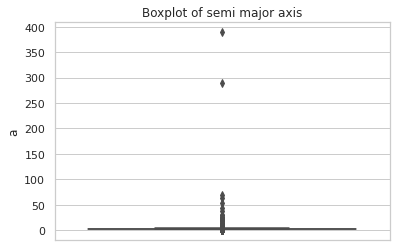

In [ ]:
#Plotting box plot
sns.boxplot(data=X_train,y=X_train['a'])
plt.title("Boxplot of semi major axis")

In [ ]:
print("minimum value of semi major axis columns is {}".format(min(X_train['a'])))
print("50 percentile of semi major axis columns is {}".format(np.percentile(X_train['a'],50)))
print("95 percentile of semi major axis columns is {}".format(np.percentile(X_train['a'],95)))
print("99 percentile of semi major axis columns is {}".format(np.percentile(X_train['a'],99)))
print("maximum value of semi major axis columns is {}".format(max(X_train['a'])))

minimum value of semi major axis columns is 0.6262255386195801
50 percentile of semi major axis columns is 2.751649861876543
95 percentile of semi major axis columns is 3.218320584256743
99 percentile of semi major axis columns is 5.1819658420115955
maximum value of semi major axis columns is 389.1459641965956


Distribution of semi major axis is highly positively skewed that means we are mostly dealing with asteroids which are near to earth .99% percent of data lies below 5.18 while maximum value is 389 . So there are many points which can be considered as outliers because having large semi major axis but we can't remove that because space is endless and it can have asteroids anywhere revolving around earth.

Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and Semi major axis')

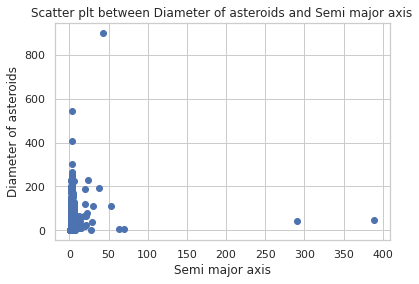

In [ ]:
#Checking relationship between Semi major axis and diameter
plt.scatter(X_train['a'],Y_train)
plt.xlabel("Semi major axis")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and Semi major axis")

In [ ]:
from scipy.stats import spearmanr
coef, p = spearmanr(X_train['a'], Y_train)
print(coef)

0.5697192569459443


We can see there is some correlation with dimaeter although it is not linear but there is some nonlinear realtionship

<h3> e- Eccentricity

Planetary motion according to Kepler's law follow elliptical path it has a parameter eccentricity . Eccentricity of ellipse is less than 1 . The eccentricity helps us to how circular it is with reference to circle . <br>
<br>
<br>
$ e= \sqrt{1-\frac{b^2}{a^2}} $
<br>
<br>
Where a is semi major axis and b is semi minor axis .

In [ ]:
#Let's check if there is some missing values or not
print("Total number of missing values in eccentricity in training dataset is {}".format(X_train['e'].isnull().sum()))
print("Total number of missing values in eccentricity in testing dataset is {}".format(X_test['e'].isnull().sum()))

Total number of missing values in eccentricity in training dataset is 0
Total number of missing values in eccentricity in testing dataset is 0


In [ ]:
X_train['e']=X_train['e'].astype('float')
Y_train=Y_train.astype('float')
X_test['e']=X_test['e'].astype('float')
Y_test=Y_test.astype('float')

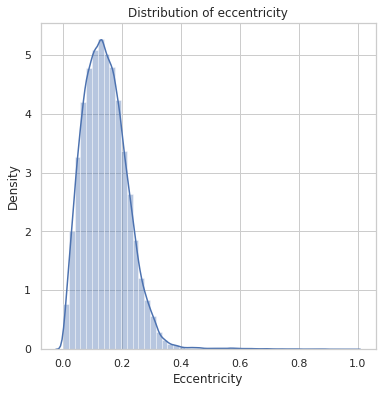

In [ ]:
#Checking distribution of eccentricity
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['e'])
plt.xlabel("Eccentricity")
plt.title("Distribution of eccentricity")
plt.show()

Distribution of eccentricity is highly positively skewed . It is somehow following log normal distribution let's check it 

In [ ]:
e_log=np.log(X_train['e'])

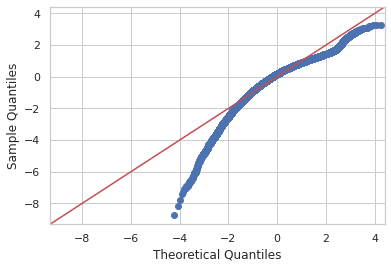

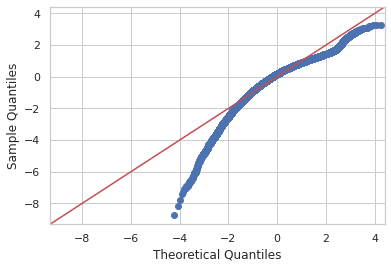

In [ ]:
sm.qqplot(e_log,line='45',fit=True,dist=stats.norm)

We can see there is lot of deviation from straight line thus it doesn't follow log-normal distribution

Text(0.5, 1.0, 'Boxplot of eccentricity')

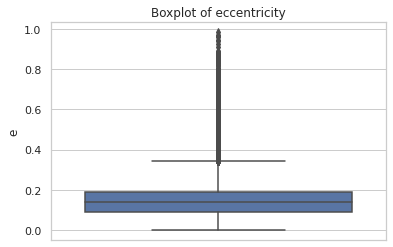

In [ ]:
sns.boxplot(data=X_train,y=X_train['e'])
plt.title("Boxplot of eccentricity")

In [ ]:
print("minimum value of eccentricity columns is {}".format(min(X_train['e'])))
print("50 percentile of eccentricity column is {}".format(np.percentile(X_train['e'],50)))
print("95 percentile of eccentricity column is {}".format(np.percentile(X_train['e'],95)))
print("99 percentile eccentricity column is {}".format(np.percentile(X_train['e'],99)))
print("maximum value of eccentricity column is {}".format(max(X_train['e'])))

minimum value of eccentricity columns is 0.0004885363213158
50 percentile of eccentricity column is 0.13840278796982045
95 percentile of eccentricity column is 0.27216810530081714
99 percentile eccentricity column is 0.3486587637810562
maximum value of eccentricity column is 0.9843481640691484


Distribution of eccentricity seems to be like of log normal distribution though it is not we confirmed it using Q-Q plot . It have some outliers points which can be confirmed seeing difference in 99 percentile and maximum value.

Text(0.5, 1.0, 'Scatter plot between eccentricity and diameter of asteroid')

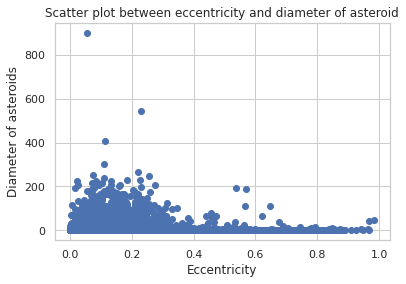

In [ ]:
#Checking relationship between eccentricity and diameter of asteroids 
plt.scatter(X_train['e'],Y_train)
plt.xlabel("Eccentricity")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between eccentricity and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['e'], Y_train)
print(coef)

-0.14830549457954262


There is very less correlation between eccentricity and diameter and that too on negative side . we can also see some outliers we will analyze it later.

<h3> i- Inclination with respect to x-y elliptical plane

All asteroids and parents follow elliptical following kepler's first law of planetary motion . All these orbits do not lie on the same plane they are usually tilted with each other .We have adopted the plane in which earth moves around the sun as reference plane . i is inclination of asteroid elliptical plane with respect to the elliptical plane in which earth revolves around sun.<br>
Reference :- https://astronomy.swin.edu.au/cosmos/O/orbital+inclination

In [ ]:
#Let's check if there is some missing values or not
print("Total number of missing values in inclination with respect to x-y plane in training dataset is {}".format(X_train['i'].isnull().sum()))
print("Total number of missing values in inclination with respect to x-y plane in testing dataset is {}".format(X_test['i'].isnull().sum()))

Total number of missing values in inclination with respect to x-y plane in training dataset is 0
Total number of missing values in inclination with respect to x-y plane in testing dataset is 0


In [ ]:
X_train['i']=X_train['i'].astype('float')
Y_train=Y_train.astype('float')
X_test['i']=X_test['i'].astype('float')
Y_test=Y_test.astype('float')

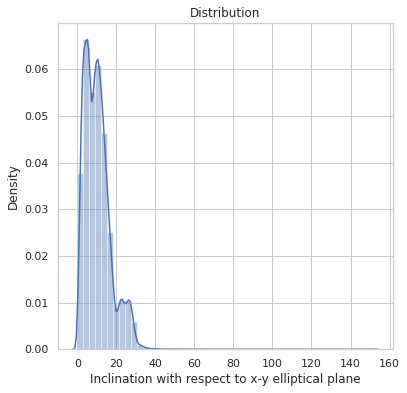

In [ ]:
#Checking distribution 
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['i'])
plt.xlabel("Inclination with respect to x-y elliptical plane")
plt.title("Distribution")
plt.show()

Text(0.5, 1.0, 'CDF of inclination with respect to x-y elliptical plane ')

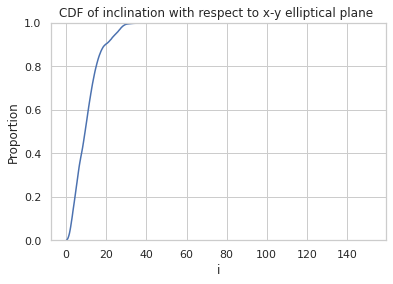

In [ ]:
sns.ecdfplot(data=X_train,x=X_train['i'])
plt.title("CDF of inclination with respect to x-y elliptical plane ")

In [ ]:
print("minimum value of inclination is {}".format(min(X_train['i'])))
print("50 percentile of inclination is {}".format(np.percentile(X_train['i'], 50))) 
print("95 percentile of inclination is {}".format(np.percentile(X_train['i'], 90))) 
print("99 percentile of inclination is {}".format(np.percentile(X_train['i'], 99))) 
print("maximum value of inclination is {}".format(max(X_train['i']))) 

minimum value of inclination is 0.04473841929128046
50 percentile of inclination is 9.416263027719989
95 percentile of inclination is 19.51737334049748
99 percentile of inclination is 29.03826756353518
maximum value of inclination is 151.8131359927367


Here inclination with respect to x-y plane is positively skewed and 99 percent of data is between 0 to 29 means there is not much inclination with respect to x-y plane for 99% of asteroids only some asteroids have very high inclination .

Text(0.5, 1.0, 'Scatter plot between Inclination and diameter of asteroid')

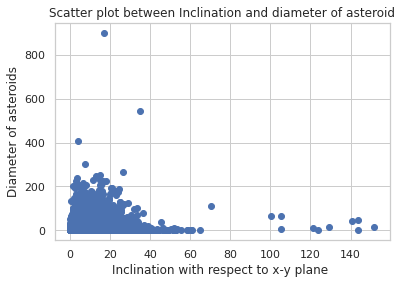

In [ ]:
plt.scatter(X_train['i'],Y_train)
plt.xlabel("Inclination with respect to x-y plane ")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between Inclination and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['i'], Y_train)
print(coef)

0.1334083818583983


There is very less correlation between inclination with respect to x-y plane and diameter of asteroid

<h3>om - longitude of the ascending node

The longitude of the ascending node (☊ or Ω) is one of the orbital elements used to specify the orbit of an object in space. It is the angle from a specified reference direction, called the origin of longitude, to the direction of the ascending node, as measured in a specified reference plane.<br>
Reference :- https://en.wikipedia.org/wiki/Longitude_of_the_ascending_node

In [ ]:
print("Number of missing values in om column in training dataset is {}".format(X_train['om'].isnull().sum()))
print("Number of missing values in om column in testing dataset is {}".format(X_test['om'].isnull().sum()))

Number of missing values in om column in training dataset is 0
Number of missing values in om column in testing dataset is 0


In [ ]:
X_train['om']=X_train['om'].astype('float')
Y_train=Y_train.astype('float')
X_test['om']=X_test['om'].astype('float')
Y_test=Y_test.astype('float')

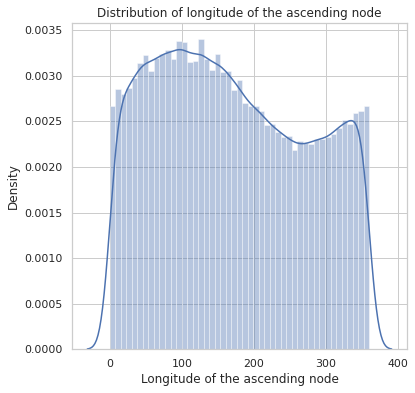

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['om'])
plt.xlabel("Longitude of the ascending node")
plt.title("Distribution of longitude of the ascending node")
plt.show()

In [ ]:
print("minimum value of longitude of the ascending node is {}".format(min(X_train['om'])))
print("50 percentile of longitude of the ascending node is {}".format(np.percentile(X_train['om'], 50))) 
print("95 percentile of longitude of the ascending node is {}".format(np.percentile(X_train['om'], 90))) 
print("99 percentile of longitude of the ascending node is {}".format(np.percentile(X_train['om'], 99))) 
print("maximum value of longitude of the ascending node is {}".format(max(X_train['om']))) 

minimum value of longitude of the ascending node is 0.0007381194225785
50 percentile of longitude of the ascending node is 160.2974561785569
95 percentile of longitude of the ascending node is 321.0978346282518
99 percentile of longitude of the ascending node is 356.4530513929204
maximum value of longitude of the ascending node is 359.9908583489855


Longitude of the ascending node is kind of uniform distribution not properly but yeah kind of. There are almost no outliers in this column

Text(0.5, 1.0, 'Scatter plot between ascending node and diameter of asteroid')

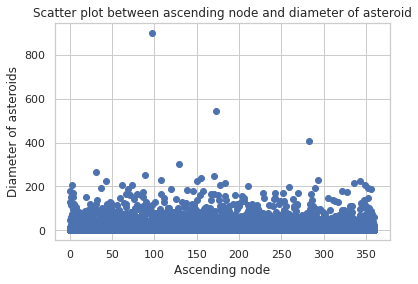

In [ ]:
#Checking relationship between ascending node and diameter
plt.scatter(X_train['om'],Y_train)
plt.xlabel("Ascending node")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between ascending node and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['om'], Y_train)
print(coef)

0.002181142320756181


There is almost no correlation between ascending node and diameter of asteroids

<h3>w- argument of perihelion

Perihelion is the point of closest approach between the orbiting body (asteroids in this case) and the focus . If we rotate the axis of the orbit around the focus then the rotation angle is the argument of perhelion .If we rotate the axis of the orbit around the focus, then the rotation angle is the argument of perihelion (ω)<br>
<img src="https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/ellipticalorbit.1.jpg"><br>
<img src="https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/argumentofperihelion.jpg"><br>
Reference :- https://astronomy.swin.edu.au/cosmos/a/argument+of+perihelion

In [ ]:
print("Number of missing values in argument of perihelion column in training dataset is {}".format(X_train['w'].isnull().sum()))
print("Number of missing values in argument of perihelion column in testing dataset is {}".format(X_test['w'].isnull().sum()))


Number of missing values in argument of perihelion column in training dataset is 0
Number of missing values in argument of perihelion column in testing dataset is 0


In [ ]:
X_train['w']=X_train['w'].astype('float')
Y_train=Y_train.astype('float')
X_test['w']=X_test['w'].astype('float')
Y_test=Y_test.astype('float')

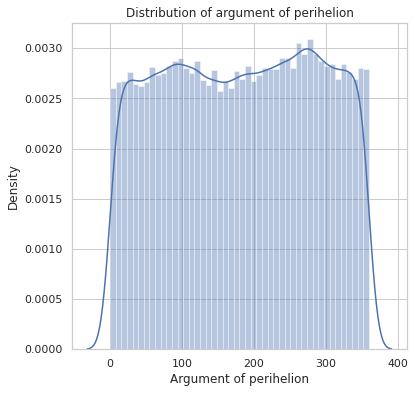

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['w'])
plt.xlabel("Argument of perihelion")
plt.title("Distribution of argument of perihelion")
plt.show()

In [ ]:
print("minimum value of argument of perihelion is {}".format(min(X_train['w']))) 
print("50 percentile of argument of perihelion is {}".format(np.percentile(X_train['w'], 50))) 
print("95 percentile of argument of perihelion is {}".format(np.percentile(X_train['w'], 90))) 
print("99 percentile of argument of perihelion is {}".format(np.percentile(X_train['w'], 99))) 
print("maximum value of argument of perihelion is {}".format(max(X_train['w']))) 



minimum value of argument of perihelion is 0.01022452820345908
50 percentile of argument of perihelion is 183.5720701406945
95 percentile of argument of perihelion is 324.0460906617637
99 percentile of argument of perihelion is 356.2274759933288
maximum value of argument of perihelion is 359.9888857434956


Distribution of argument of perihelion is kind of uniform distributed . There are almost no outliers

Text(0.5, 1.0, 'Scatter plot between argument of perihelion and diameter of asteroid')

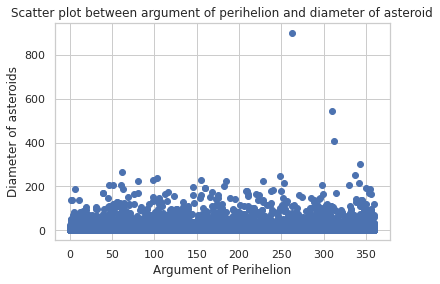

In [ ]:
plt.scatter(X_train['w'],Y_train)
plt.xlabel("Argument of Perihelion")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between argument of perihelion and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['w'], Y_train)
print(coef)

0.0032513948115996


There are almost no correlation at all between Argument of perihelion and diameter of asteroid.

<h3>q - perihelion distance

Perihelion is the point in elliptical path which is closest between revolving body(asteroids in this case) and body around which it revolves(earth in this case) . Perihelion distance is distance between earth and perihelion

In [ ]:
print("No of missing points in perihelion distance column in training dataset is {}".format(X_train['q'].isnull().sum()))
print("No of missing points in perihelion distance column in testing dataset is {}".format(X_test['q'].isnull().sum()))

No of missing points in perihelion distance column in training dataset is 0
No of missing points in perihelion distance column in testing dataset is 0


In [ ]:
X_train['q']=X_train['q'].astype('float')
Y_train=Y_train.astype('float')
X_test['q']=X_test['q'].astype('float')
Y_test=Y_test.astype('float')

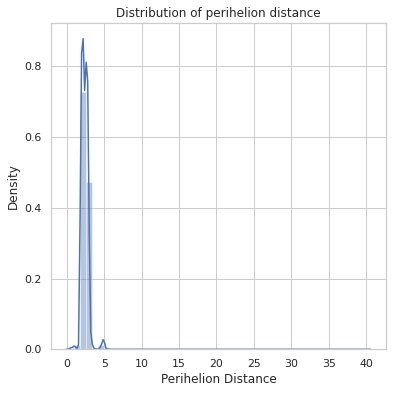

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['q'])
plt.xlabel("Perihelion Distance")
plt.title("Distribution of perihelion distance")
plt.show()

In [ ]:
print("Minimum value of perihelion distance is {}".format(min(X_train['q'])))
print("50 percentile of perihelion distance is {}".format(np.percentile(X_train['q'], 50))) 
print("95 percentile of perihelion distance is {}".format(np.percentile(X_train['q'], 90))) 
print("99 percentile of perihelion distance is {}".format(np.percentile(X_train['q'], 99))) 
print("Maximum value of perihelion distance is {}".format(max(X_train['q']))) 

Minimum value of perihelion distance is 0.08188215046210022
50 percentile of perihelion distance is 2.3641586026490495
95 percentile of perihelion distance is 2.88427269447035
99 percentile of perihelion distance is 4.735963816761822
Maximum value of perihelion distance is 40.46567138768128


Perhelion Distance is highly skewed and there are so many outliers points 99% of data is under 4.73 only while the maximum value is 40.46.

Text(0.5, 1.0, 'Scatter plot between perihelion distance and diameter of asteroid')

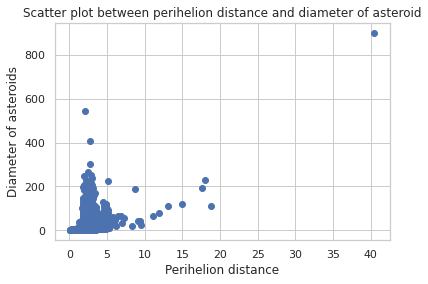

In [ ]:
plt.scatter(X_train['q'],Y_train)
plt.xlabel("Perihelion distance")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between perihelion distance and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['q'], Y_train)
print(coef)

0.523488964662777


There is some postive non linear correlation between Perihilion distance and diameter of asteroids. 

<h3>
ad - aphelion distance

Aphelion is the point in elliptical path which is farthest between revolving body(asteroids in this case) and body around which it revolves(earth in this case) . Aphelion distance is distance between earth and aphelion.

In [ ]:
print("Number of missing values in aphelion distance column in training dataset is {}".format(X_train['ad'].isnull().sum()))
print("Number of missing values in aphelion distance column in testing dataset is {}".format(X_test['ad'].isnull().sum()))

Number of missing values in aphelion distance column in training dataset is 0
Number of missing values in aphelion distance column in testing dataset is 0


In [ ]:
X_train['ad']=X_train['ad'].astype('float')
Y_train=Y_train.astype('float')
X_test['ad']=X_test['ad'].astype('float')
Y_test=Y_test.astype('float')

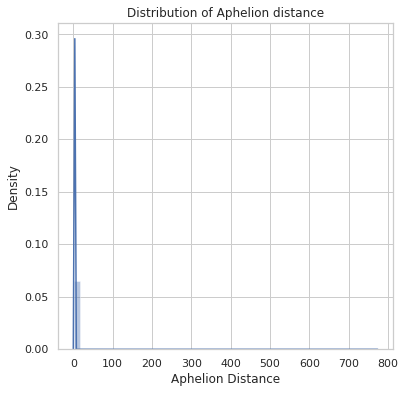

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['ad'])
plt.xlabel("Aphelion Distance")
plt.title("Distribution of Aphelion distance")
plt.show()

Text(0.5, 1.0, 'Box plot of aphelion distance')

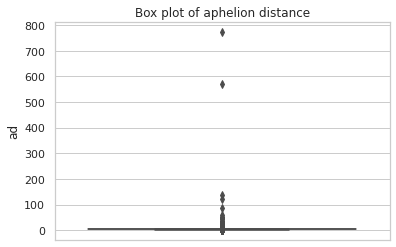

In [ ]:
sns.boxplot(data=X_train,y=X_train['ad'])
plt.title("Box plot of aphelion distance")

In [ ]:
print("Min value of aphelion distance is {}".format(min(X_train['ad'])))
print("50 percentile of aphelion distance is {}".format(np.percentile(X_train['ad'], 50))) 
print("95 percentile of aphelion distance is {}".format(np.percentile(X_train['ad'], 90))) 
print("99 percentile of aphelion distance is {}".format(np.percentile(X_train['ad'], 99)))
print("Max value of aphelion distance is {}".format(max(X_train['ad'])))

Min value of aphelion distance is 0.9999559149519088
50 percentile of aphelion distance is 3.167737163060644
95 percentile of aphelion distance is 3.734283055823061
99 percentile of aphelion distance is 5.486717977274724
Max value of aphelion distance is 772.2010796084331


Distribution of aphelion distance is highly positively skewed and 99% of data is under 5.48 only and maximum value of aphelion distance is 772 so there are so many outliers.

Text(0.5, 1.0, 'Scatter plot between aphelion distance and diameter of asteroid')

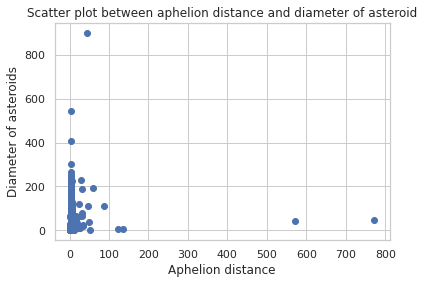

In [ ]:
plt.scatter(X_train['ad'],Y_train)
plt.xlabel("Aphelion distance")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between aphelion distance and diameter of asteroid")


In [ ]:
coef, p = spearmanr(X_train['ad'], Y_train)
print(coef)

0.48286343179497343


We can see some outliers in scatter plit between aphelion distance and diameter of asteroids we will deal with outliers in later . We can also see some positive correlation between aphelion distance and diameter of asteroids.

<h3>per_y - orbital period

The orbital period (also revolution period) is the amount of time a given astronomical object takes to complete one orbit around another object.

In [ ]:
print("Number of missing values in orbital period column in training dataset is {}".format(X_train['per_y'].isnull().sum()))
print("Number of missing values in orbital period column in testing dataset is {}".format(X_test['per_y'].isnull().sum()))

Number of missing values in orbital period column in training dataset is 0
Number of missing values in orbital period column in testing dataset is 0


In [ ]:
X_train['per_y']=X_train['per_y'].astype('float')
Y_train=Y_train.astype('float')
X_test['per_y']=X_test['per_y'].astype('float')
Y_test=Y_test.astype('float')

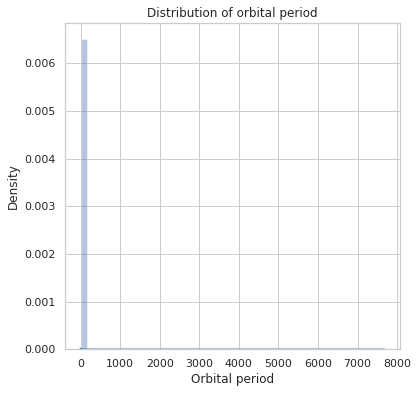

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['per_y'])
plt.xlabel("Orbital period")
plt.title("Distribution of orbital period")
plt.show()

In [ ]:
print("Min value of Orbital period is {}".format(min(X_train['per_y'])))
print("50 percentile of Orbital period is {}".format(np.percentile(X_train['per_y'], 50))) 
print("95 percentile of Orbital period is {}".format(np.percentile(X_train['per_y'], 90))) 
print("99 percentile of Orbital period is {}".format(np.percentile(X_train['per_y'], 99)))
print("Max value of Orbital period is {}".format(max(X_train['per_y'])))

Min value of Orbital period is 0.495569266063932
50 percentile of Orbital period is 4.564549888971575
95 percentile of Orbital period is 5.66647423771826
99 percentile of Orbital period is 11.796414414923584
Max value of Orbital period is 7676.74294290649


Distribution of orbital period is highly skewed and 99% of data is below 11.79 only while maximum value of orbital period is 7676.74 .

Text(0.5, 1.0, 'Scatter plot between orbital period and diameter of asteroid')

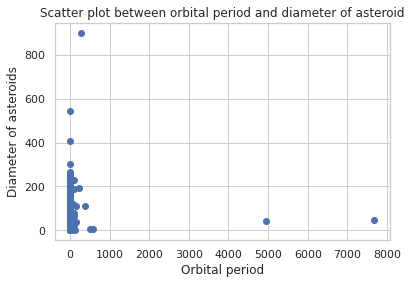

In [ ]:
plt.scatter(X_train['per_y'],Y_train)
plt.xlabel("Orbital period")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between orbital period and diameter of asteroid")


In [ ]:
coef, p = spearmanr(X_train['per_y'], Y_train)
print(coef)

0.5697192569459443


Here in scatter plot we can see some outliers also we can see there is some positive correaltion between orbital period and diameter of asteroids

<h3>data_Arc - data arc span(d)

In [ ]:
print("Number of missing value in data arc span column in training dataset is {}".format(X_train['data_arc'].isnull().sum()))
print("Number of missing value in data arc span column in testing dataset is {}".format(X_test['data_arc'].isnull().sum()))

Number of missing value in data arc span column in training dataset is 94
Number of missing value in data arc span column in testing dataset is 44


In [ ]:
#There are many methods to fill missing values for continous column either by mean,median or by making a simple machine learning model here number of missing value is not large so i will fill missing values with median of the column
X_train['data_arc']=X_train['data_arc'].fillna(X_train['data_arc'].median())

In [ ]:
#Filling for test dataset
X_test['data_arc']=X_test['data_arc'].fillna(X_train['data_arc'].median())

In [ ]:
X_train['data_arc']=X_train['data_arc'].astype('float')
Y_train=Y_train.astype('float')
X_test['data_arc']=X_test['data_arc'].astype('float')
Y_test=Y_test.astype('float')

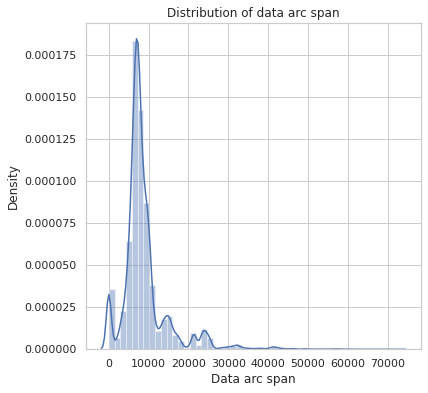

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['data_arc'])
plt.xlabel("Data arc span")
plt.title("Distribution of data arc span")
plt.show()

In [ ]:
print("Min value of data arc span is {}".format(min(X_train['data_arc'])))
print("50 percentile of data arc span is {}".format(np.percentile(X_train['data_arc'], 50))) 
print("95 percentile of data arc span is {}".format(np.percentile(X_train['data_arc'], 90))) 
print("99 percentile of data arc span is {}".format(np.percentile(X_train['data_arc'], 99)))
print("Max value of data arc span is {}".format(max(X_train['data_arc'])))

Min value of data arc span is 1.0
50 percentile of data arc span is 7569.0
95 percentile of data arc span is 15202.0
99 percentile of data arc span is 33313.850000000006
Max value of data arc span is 72684.0


Data arc span column contains some outliers 99 percent of value is below 33313.85 while maximum value in 72684.0

Text(0.5, 1.0, 'Scatter plot between data arc span and diameter of asteroid')

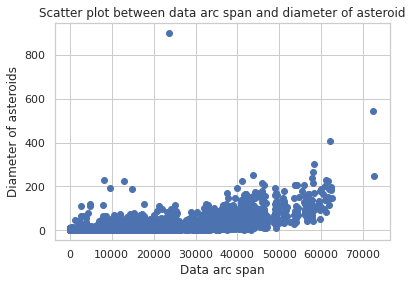

In [ ]:

plt.scatter(X_train['data_arc'],Y_train)
plt.xlabel("Data arc span")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between data arc span and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['data_arc'], Y_train)
print(coef)

0.3760998192654934


There se some positive correlation between data arc span and diameter of asteroid not much but these is some correlaion between both of them . We can also see some outlier points in scatter plot graph.

<h3>condition_Code = orbit condition code

The orbit condition code, also known as the U uncertainty parameter, is an integer between 0 and 9 indicating how well an object's orbit is known on a logarithmic scale, where 0 indicates a well-determined orbit.

In [ ]:
print("Number of missing value in condition code in training dataset are {}".format(X_train['condition_code'].isnull().sum()))
print("Number of missing value in condition code in testing dataset are {}".format(X_test['condition_code'].isnull().sum()))

Number of missing value in condition code in training dataset are 0
Number of missing value in condition code in testing dataset are 0


In [ ]:
X_train['condition_code']=X_train['condition_code'].astype('int')

In [ ]:
temp=list(X_train.groupby('condition_code').size())
temp_df={'condition_code':[],'count':[]}
for index,value in enumerate(temp) :
  temp_df['condition_code'].append(str(index))
  temp_df['count'].append(value)
temp_df=pd.DataFrame(temp_df)

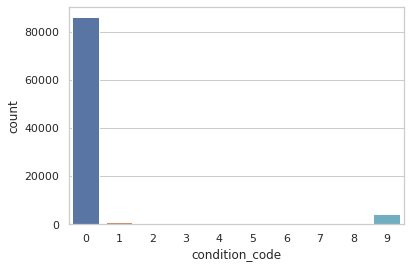

In [ ]:
sns.barplot(x="condition_code", y="count", data=temp_df)


Condition code is highly imbalanced with most of the asteroids having condition code having value 0 which means we are mostly dealing with asteroids whom orbit are well defined. Second highest condition code is 9 and all other condition code have little values.

In [ ]:
temp_hist=pd.concat([X_train,Y_train],axis=1)

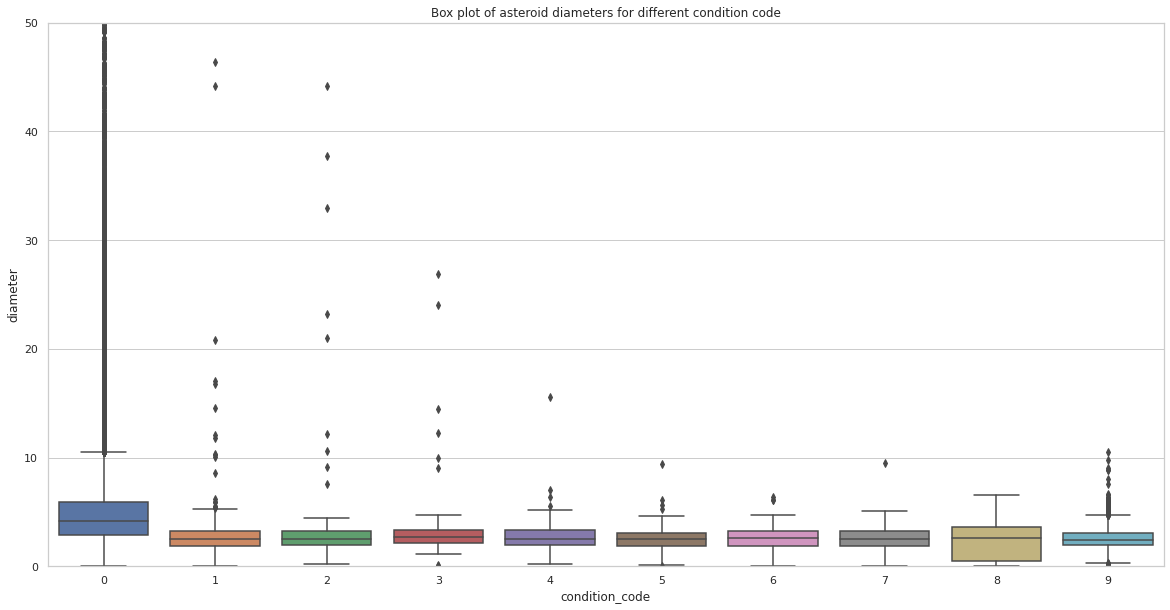

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=temp_hist,x='condition_code',y='diameter')
plt.ylim((0,50))
plt.title("Box plot of asteroid diameters for different condition code")
plt.show()

We can see box plo of Asteroid diameter for most of the condition code all overlapping with each other . But we can differentiate for 0 condition code and 8 condition code . Most of our data is in condition code so this seems to be an important feature to determine diameter of asteroids

<h3>n_obs_used - number of observation used

Calculating diameter of asteroids is very hard for that  we need to make multiple observation with powerful telescopes. Number of observation used in a datapoint gives us value of number of observation made to calculate diameter of asteroids

In [ ]:
print("Number of missing values is number of observation used column in training dataset {}".format(X_train['n_obs_used'].isnull().sum()))
print("Number of missing values is number of observation used column in testing dataset {}".format(X_test['n_obs_used'].isnull().sum()))

Number of missing values is number of observation used column in training dataset 0
Number of missing values is number of observation used column in testing dataset 0


In [ ]:
X_train['n_obs_used']=X_train['n_obs_used'].astype('int')
Y_train=Y_train.astype('float')
X_test['n_obs_used']=X_test['n_obs_used'].astype('int')
Y_test=Y_test.astype('float')

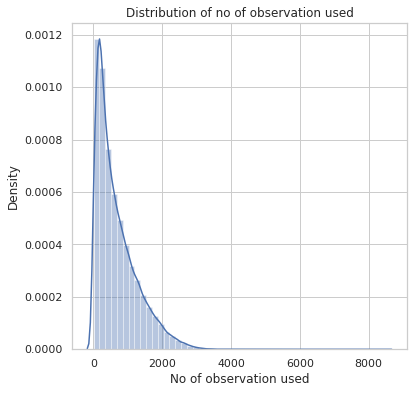

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['n_obs_used'])
plt.xlabel("No of observation used")
plt.title("Distribution of no of observation used")
plt.show()

In [ ]:
print("50 percentile of no of obs used is {}".format(np.percentile(X_train['n_obs_used'], 50))) 
print("95 percentile of no of obs used is {}".format(np.percentile(X_train['n_obs_used'], 90))) 
print("99 percentile of no of obs used is {}".format(np.percentile(X_train['n_obs_used'], 99)))
print("Max value of no of obs used is {}".format(max(X_train['n_obs_used'])))

50 percentile of no of obs used is 494.0
95 percentile of no of obs used is 1534.0
99 percentile of no of obs used is 2525.0
Max value of no of obs used is 8490


Distribution of number of observation is positively skewed and it contains many outliers which can be seen by seeing difference in 99 percentile and maximum value of number of observation used.

Text(0.5, 1.0, 'Scatter plot between number of observation used and diameter of asteroid')

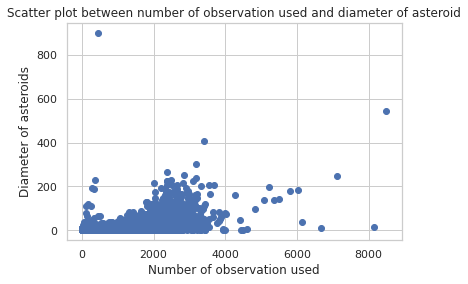

In [ ]:
plt.scatter(X_train['n_obs_used'],Y_train)
plt.xlabel("Number of observation used")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between number of observation used and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['n_obs_used'], Y_train)
print(coef)

0.43058756446451335


There seems to be a positive correlation between number od observation used and diameter of asteroids.

<h3>
H - absolute magnitude parameter

The absolute magnitude, commonly called H, is defined as the apparent magnitude that the object would have if it were one astronomical unit (AU) from both the Sun and the observer, and in conditions of ideal solar opposition (an arrangement that is impossible in practice).

In [ ]:
print("Number of missing value in absolute magnitude parameter column in training dataset is {}".format(X_train['H'].isnull().sum()))
print("Number of missing value in absolute magnitude parameter column in testing dataset is {}".format(X_test['H'].isnull().sum()))

Number of missing value in absolute magnitude parameter column in training dataset is 509
Number of missing value in absolute magnitude parameter column in testing dataset is 238


In [ ]:
#There are many methods to fill missing value we can just drop the whole datapoint , aur fill with mean or median or we can build a small machine learning model which will help us to fill Nan values
#I will treat this as a machine learning problem and try to miniize root mean square error i will try knn , linear regression and random forest
temp=temp_hist[temp_hist['H'].notnull()]
X_temp=temp[['diameter']]
Y_temp=temp[['H']]
X_train_temp,X_test_temp,Y_train_temp,Y_test_temp=train_test_split(X_temp,Y_temp,test_size=0.3)

In [ ]:
#Making simple KNN model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
train_accuracy=[]
test_accuracy=[]
k_n=[1,3,5,10,15,25]
for i in k_n :
  neigh=KNeighborsRegressor(n_neighbors=i)
  neigh.fit(X_train_temp,Y_train_temp)
  Y_train_pred=neigh.predict(X_train_temp)
  train_accuracy.append(mean_squared_error(Y_train_temp,Y_train_pred))
  Y_test_pred=neigh.predict(X_test_temp)
  test_accuracy.append(mean_squared_error(Y_test_temp,Y_test_pred))

In [ ]:

print("Minimum test error in knn model is {}".format(min(test_accuracy)))

Minimum test error in knn model is 0.6014708830808999


In [ ]:
#Making a linear regression model 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_temp,Y_train_temp)
Y_train_pred=lr.predict(X_train_temp)
train_error_linear=mean_squared_error(Y_train_temp,Y_train_pred)
Y_test_pred=lr.predict(X_test_temp)
test_error_linear=mean_squared_error(Y_test_temp,Y_test_pred)

In [ ]:
print("Minimum test error in linear regression model is {}".format(test_error_linear))

Minimum test error in linear regression model is 1.2494664382283032


In [ ]:
#Making a random Forest model
from sklearn.ensemble import RandomForestRegressor
#There are many hyperparameter in random forest i will play with
train_accuracy_rf=[]
test_accuracy_rf=[]
k=[10,20,40,60,100]
for i in k :
  rf=RandomForestRegressor(n_estimators=i)
  rf.fit(X_train_temp,Y_train_temp)
  Y_train_pred=rf.predict(X_train_temp)
  train_accuracy_rf.append(mean_squared_error(Y_train_temp,Y_train_pred))
  Y_test_pred=rf.predict(X_test_temp)
  test_accuracy_rf.append(mean_squared_error(Y_test_temp,Y_test_pred)) 

In [ ]:
print("Minimum test error in random forest model is {}".format(min(test_accuracy_rf)))

Minimum test error in random forest model is 0.6662742018914154


In [ ]:
#Just joing X_train and Y_train for temporary time and filling according to model we build
train_temp=pd.concat([X_train,Y_train],axis=1)

I tried with three models KNNRegressor , Linear Regression and RandomForest Regressor KNNRegrssor was best among all three with least meansquarederror

In [ ]:
np.argmin(test_accuracy)

5

In [ ]:
#Best k is where test loss is minimum 
import math
best_k=k_n[np.argmin(test_accuracy)]
best_neigh=KNeighborsRegressor(n_neighbors=best_k)
best_neigh.fit(X_train_temp,Y_train_temp)
for index,value in train_temp.iterrows() :
  if math.isnan(value['H'])==True :
    train_temp.at[index,'H']=best_neigh.predict(np.array(value['diameter']).reshape(1,-1))[0][0]

In [ ]:

#Joining X_test and Y_Test for temporary time and filling according to model we build
test_temp=pd.concat([X_test,Y_test],axis=1)

In [ ]:
best_k=k_n[np.argmin(test_accuracy)]
best_neigh=KNeighborsRegressor(n_neighbors=best_k)
best_neigh.fit(X_train_temp,Y_train_temp)
count=0
for index,value in test_temp.iterrows() :
  if math.isnan(value['H'])==True :
    test_temp.at[index,'H']=best_neigh.predict(np.array(value['diameter']).reshape(1,-1))[0][0]

In [ ]:
#Separating X_train Y_train from train_Temp and separating X_test and Y_test from test_temp
Y_train=train_temp[['diameter']]
X_train=train_temp.drop('diameter',axis=1)
Y_test=test_temp[['diameter']]
X_test=test_temp.drop('diameter',axis=1)

In [ ]:
print("Number of missing values in training dataset in absolute magnitude parameter column is {}".format(X_train['H'].isnull().sum()))
print("Number of missing values in testing dataset in absolute magnitude parameter column is {}".format(X_test['H'].isnull().sum()))

Number of missing values in training dataset in absolute magnitude parameter column is 0
Number of missing values in testing dataset in absolute magnitude parameter column is 0


In [ ]:
print("Min value of absolute magnitude parameter is {}".format(min(X_train['H'])))
print("50 percentile of absolute magnitude parameter is {}".format(np.percentile(X_train['H'], 50))) 
print("95 percentile of absolute magnitude parameter is {}".format(np.percentile(X_train['H'], 90))) 
print("99 percentile of absolute magnitude parameter is {}".format(np.percentile(X_train['H'], 99)))
print("Max value of absolute magnitude parameter is {}".format(max(X_train['H'])))

Min value of absolute magnitude parameter is 3.6
50 percentile of absolute magnitude parameter is 15.3
95 percentile of absolute magnitude parameter is 16.8
99 percentile of absolute magnitude parameter is 18.0
Max value of absolute magnitude parameter is 29.9


<h3> neo - Near Earth Objects

A near-Earth object (NEO) is any small Solar System body whose orbit brings it into proximity with Earth. By convention, a Solar System body is a NEO if its closest approach to the Sun (perihelion) is less than 1.3 astronomical units (AU). If a NEO's orbit crosses the Earth's, and the object is larger than 140 meters (460 ft) across, it is considered a potentially hazardous object (PHO).Most known PHOs and NEOs are asteroids, but a small fraction are comets.<br>
Reference - https://en.wikipedia.org/wiki/Near-Earth_object

In [ ]:
print("Number of missing values in training dataset in neo column is {}".format(X_train['neo'].isnull().sum()))
print("Number of missing values in testing dataset in neo column is {}".format(X_test['neo'].isnull().sum()))

Number of missing values in training dataset in neo column is 0
Number of missing values in testing dataset in neo column is 0


In [ ]:
temp=list(X_train.groupby('neo').size())
temp_df={'neo':[],'count':[]}
for index,value in enumerate(temp) :
  temp_df['count'].append(value)
temp_df['neo'].extend(['N','Y'])
temp_df=pd.DataFrame(temp_df)
temp_df.columns=['neo','count']

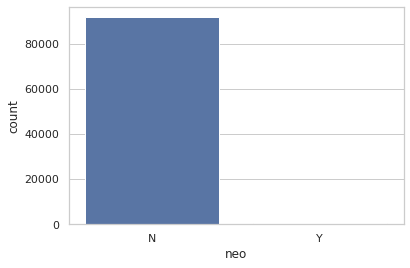

In [ ]:
sns.barplot(x="neo", y="count", data=temp_df)

In [ ]:
print("Percentage of Near earth objects are {}".format((563)/(563+91653)))

Percentage of Near earth objects are 0.006105231196321679


Near earth object column is highly imbalanced column only 0.006% of asteroids we have in training set belongs to Near earth objects

No handles with labels found to put in legend.


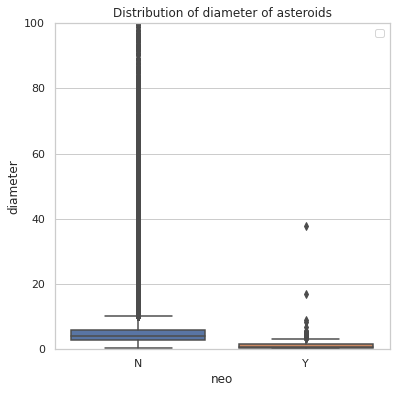

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(data=temp_hist,x='neo',y='diameter')
plt.title("Distribution of diameter of asteroids")
plt.ylim(0,100)
plt.legend()
plt.show()

Distribution of diameter is not exactly overlapping for neo objects and non-neo objects . So it sems to be a vital column to estimate diameter

<h3>pha - Potentially hazardous object

A potentially hazardous object (PHO) is a near-Earth object – either an asteroid or a comet – with an orbit that can make close approaches to the Earth and is large enough to cause significant regional damage in the event of impact.They are defined as having a minimum orbit intersection distance with Earth of less than 0.05 astronomical units (19.5 lunar distances) and an absolute magnitude of 22 or brighter.

In [ ]:
print("Number of missing value in training dataset of pha column is {}".format(X_train['pha'].isnull().sum()))
print("Number of missing values in testing dataset of pha column is {}".format(X_test['pha'].isnull().sum()))

Number of missing value in training dataset of pha column is 0
Number of missing values in testing dataset of pha column is 0


In [ ]:
temp=list(X_train.groupby('pha').size())
temp_df={'pha':[],'count':[]}
for index,value in enumerate(temp) :
  temp_df['count'].append(value)
temp_df['pha'].extend(['N','Y'])
temp_df=pd.DataFrame(temp_df)
temp_df.columns=['pha','count']

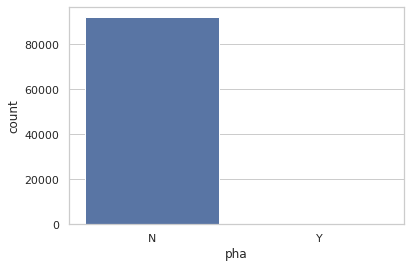

In [ ]:
sns.barplot(x="pha", y="count", data=temp_df)

In [ ]:
print("Percentage of Physically hazardous objects are {}".format((141)/(141+92075)))

Percentage of Physically hazardous objects are 0.0015290188253665308


Physically hazardous  column is highly imbalanced column only 0.0015% of asteroids we have in training set belongs to hysically hazardous objects

No handles with labels found to put in legend.


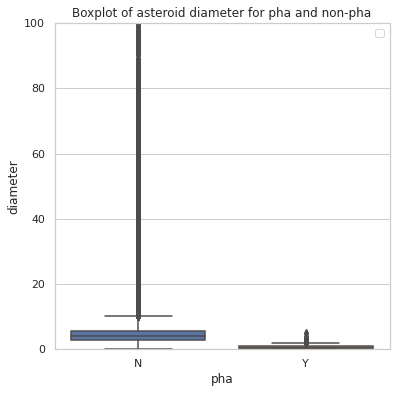

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(data=temp_hist,x='pha',y='diameter')
plt.title("Boxplot of asteroid diameter for pha and non-pha")
plt.ylim((0,100))
plt.legend()
plt.show()

Distribution of asteroids diameter for pha and non pha are ot exactly overlapping with each other and seems to be a good feature to determine asteroid diameter

<h3>extent - Object bi/tri axial ellipsoid dimensions(Km)

An ellipsoid is a surface that may be obtained from a sphere by deforming it by means of directional scalings, or more generally, of an affine transformation.
The line segments that are delimited on the axes of symmetry by the ellipsoid are called the principal axes, or simply axes of the ellipsoid. If the three axes have different lengths, the figure is a triaxial ellipsoid. If the three axes have different lengths, the figure is a triaxial ellipsoid

In [ ]:
print("Number of missing values in extent column in training dataset {}".format(X_train['extent'].isnull().sum()))
print("Number of missing values in extent column in testing dataset {}".format(X_test['extent'].isnull().sum()))

Number of missing values in extent column in training dataset 92206
Number of missing values in extent column in testing dataset 45414


In [ ]:
print("Percentage of missing values in extent column in training dataset {}".format((X_train['extent'].isnull().sum())/(X_train.shape[0])))
print("Percentage of missing values in extent column in testing dataset {}".format((X_test['extent'].isnull().sum())/(X_test.shape[0])))

Percentage of missing values in extent column in training dataset 0.9998915589485555
Percentage of missing values in extent column in testing dataset 0.9998678996036988


99% of value in these columns are missing so there is no way we can fill missing values in these column and hence we will discard it

In [ ]:
X_train=X_train.drop('extent',axis=1)
X_test=X_test.drop('extent',axis=1)

<h3>albedo - geometric albedo 

In astronomy, the geometric albedo of a celestial body is the ratio of its actual brightness as seen from the light source (i.e. at zero phase angle) to that of an idealized flat, fully reflecting, diffusively scattering (Lambertian) disk with the same cross-section. (This phase angle refers to the direction of the light paths and is not a phase angle in its normal meaning in optics or electronics.)

In [ ]:
print("Number of missing values in albedo column in training dataset is {}".format(X_train['albedo'].isnull().sum()))
print("Number of missing values in albedo column in testing dataset is {}".format(X_test['albedo'].isnull().sum()))

Number of missing values in albedo column in training dataset is 842
Number of missing values in albedo column in testing dataset is 388


In [ ]:
temp=temp_hist[temp_hist['albedo'].notnull()]
#WE used oonly diameter in our prevois model let's just use diameter + H this time
X_temp=temp[['diameter']]
Y_temp=temp[['albedo']]
X_train_temp,X_test_temp,Y_train_temp,Y_test_temp=train_test_split(X_temp,Y_temp,test_size=0.3)

In [ ]:
#Making simple KNN model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
train_error_knn=[]
test_error_knn=[]
k=[1,3,5,10,15,25]
for i in k :
  neigh=KNeighborsRegressor(n_neighbors=i)
  neigh.fit(X_train_temp,Y_train_temp)
  Y_train_pred=neigh.predict(X_train_temp)
  train_error_knn.append(mean_squared_error(Y_train_temp,Y_train_pred))
  Y_test_pred=neigh.predict(X_test_temp)
  test_error_knn.append(mean_squared_error(Y_test_temp,Y_test_pred))

In [ ]:
print("Minimum error in knn model is {}".format(min(test_error_knn)))

Minimum error in knn model is 0.01136434723328698


In [ ]:
#Random Forest Regressor
train_error_rf=[]
test_error_rf=[]
k=[1,10,20,50,100]
for i in k :
  rf=RandomForestRegressor(n_estimators=i,random_state=42)
  rf.fit(X_train_temp,Y_train_temp)
  Y_train_pred=rf.predict(X_train_temp)
  train_error_rf.append(mean_squared_error(Y_train_temp,Y_train_pred))
  Y_test_pred=rf.predict(X_test_temp)
  test_error_rf.append(mean_squared_error(Y_test_temp,Y_test_pred))

In [ ]:
print("Minimum error in random forest model is {}".format(min(test_error_rf)))

Minimum error in random forest model is 0.012372689661900905


In [ ]:
#Experimeting with GBDT 
from sklearn.ensemble import GradientBoostingRegressor
train_error_gb=[]
test_error_gb=[]
k=[1,10,20,50,100]
for i in k :
  gb=GradientBoostingRegressor(n_estimators=i,random_state=42)
  gb.fit(X_train_temp,Y_train_temp)
  Y_train_pred=gb.predict(X_train_temp)
  train_error_gb.append(mean_squared_error(Y_train_temp,Y_train_pred))
  Y_test_pred=gb.predict(X_test_temp)
  test_error_gb.append(mean_squared_error(Y_test_temp,Y_test_pred))

In [ ]:
print("Minimum error in gbdt model is {}".format(min(test_error_gb)))

Minimum error in gbdt model is 0.010983724493997043


In [ ]:
#Just joing X_train and Y_train for temporary time and filling according to model we build
train_temp=pd.concat([X_train,Y_train],axis=1)

In [ ]:
#We get minimum error in gbdt model 
import math
best_k=k[np.argmin(test_error_gb)]
best_gb=GradientBoostingRegressor(n_estimators=best_k)
best_gb.fit(X_train_temp,Y_train_temp)
for index,value in train_temp.iterrows() :
  if math.isnan(value['albedo'])==True :
    train_temp.at[index,'albedo']=best_gb.predict(np.array(value['diameter']).reshape(1,-1))[0]



In [ ]:
#Joining X_test and Y_Test for temporary time and filling according to model we build
test_temp=pd.concat([X_test,Y_test],axis=1)

In [ ]:
best_k=k[np.argmin(test_error_gb)]
best_gb=GradientBoostingRegressor(n_estimators=best_k)
best_gb.fit(X_train_temp,Y_train_temp)
for index,value in test_temp.iterrows() :
  if math.isnan(value['albedo'])==True :
    test_temp.at[index,'albedo']=best_gb.predict(np.array(value['diameter']).reshape(1,-1))[0]



In [ ]:
#Separating X_train Y_train from train_Temp and separating X_test and Y_test from test_temp
Y_train=train_temp[['diameter']]
X_train=train_temp.drop('diameter',axis=1)
Y_test=test_temp[['diameter']]
X_test=test_temp.drop('diameter',axis=1)

In [ ]:
print("Number of missing values in albedo column in training dataset is {}".format(X_train['albedo'].isnull().sum()))
print("Number of missing values in albedo column in testing dataset is {}".format(X_test['albedo'].isnull().sum()))

Number of missing values in albedo column in training dataset is 0
Number of missing values in albedo column in testing dataset is 0


In [ ]:
X_train['albedo']=X_train['albedo'].astype('float')
Y_train=Y_train.astype('float')

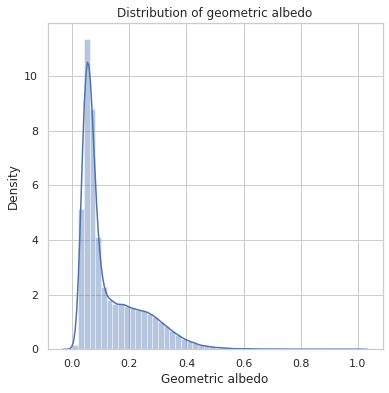

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['albedo'])
plt.xlabel("Geometric albedo")
plt.title("Distribution of geometric albedo")
plt.show()

In [ ]:
print("Min value of Geometric albedo is {}".format(min(X_train['albedo'])))
print("50 percentile of Geometric albedo is {}".format(np.percentile(X_train['albedo'], 50))) 
print("95 percentile of Geometric albedo is {}".format(np.percentile(X_train['albedo'], 90))) 
print("99 percentile of Geometric albedo is {}".format(np.percentile(X_train['albedo'], 99)))
print("Max value of Geometric albedo is {}".format(max(X_train['albedo'])))

Min value of Geometric albedo is 0.001
50 percentile of Geometric albedo is 0.079
95 percentile of Geometric albedo is 0.294
99 percentile of Geometric albedo is 0.464
Max value of Geometric albedo is 1.0


Geometric albedo column is positively skewed with 99 percent value is below 0.464 and maximum value in 1.0 so there are so many outliers in this column

Text(0.5, 1.0, 'Scatter plot between albedo and diameter of asteroid')

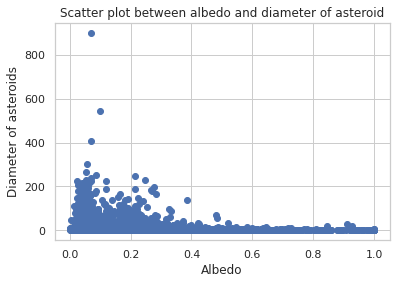

In [ ]:
plt.scatter(X_train['albedo'],Y_train)
plt.xlabel("Albedo")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between albedo and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['albedo'], Y_train)
print(coef)

-0.27321198034351774


There seems to be negative correlation between albedo and diameter of asteroids

<h3> Moid

In [ ]:
print("Number of missing values in moid column in training dataset is {}".format(X_train['moid'].isnull().sum()))
print("Number of missing values in moid column in testing dataset is {}".format(X_test['moid'].isnull().sum()))

Number of missing values in moid column in training dataset is 0
Number of missing values in moid column in testing dataset is 0


In [ ]:
X_train['moid']=X_train['moid'].astype('float')
Y_train=Y_train.astype('float')
X_test['moid']=X_test['moid'].astype('float')
Y_test=Y_test.astype('float')

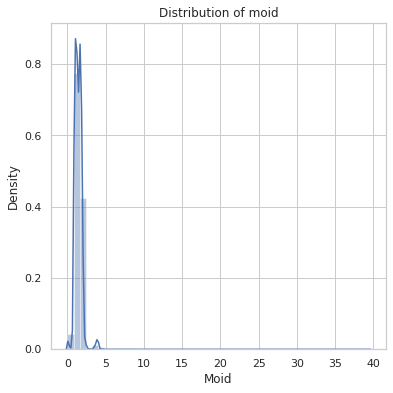

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['moid'])
plt.xlabel("Moid")
plt.title("Distribution of moid")
plt.show()

In [ ]:
print("Min value of moid is {}".format(min(X_train['moid'])))
print("50 percentile of moid is {}".format(np.percentile(X_train['moid'], 50))) 
print("95 percentile of moid is {}".format(np.percentile(X_train['moid'], 90))) 
print("99 percentile of moid is {}".format(np.percentile(X_train['moid'], 99)))
print("Max value of moid is {}".format(max(X_train['moid'])))

Min value of moid is 0.000307103
50 percentile of moid is 1.385305
95 percentile of moid is 1.90173
99 percentile of moid is 3.756564500000001
Max value of moid is 39.507


There is large difference 99 percentile value and maximum value which suggest of outliers

Text(0.5, 1.0, 'Scatter plot between moid and diameter of asteroid')

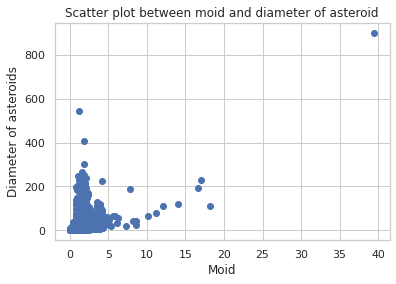

In [ ]:
plt.scatter(X_train['moid'],Y_train)
plt.xlabel("Moid")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between moid and diameter of asteroid")


In [ ]:
coef, p = spearmanr(X_train['moid'], Y_train)
print(coef)

0.5280713230250377


There is some positive correlation between moid and asteroid diameter

<h3>
rot_per - rotation period

The rotation period of a celestial object (e.g., star, gas giant, planet, moon, asteroid) may refer to its sidereal rotation period, i.e. the time that the object takes to complete a single revolution around its axis of rotation relative to the background stars, measured in sidereal time

In [ ]:
print("Number of missing values in rotation period column in training dataset is {}".format(X_train['rot_per'].isnull().sum()))
print("Number of missing values in rotation period column in testing dataset is {}".format(X_test['rot_per'].isnull().sum()))

Number of missing values in rotation period column in training dataset is 84790
Number of missing values in rotation period column in testing dataset is 41658


In [ ]:
print("Fraction of missing values in rotation period column in training dataset is {}".format((X_train['rot_per'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in rotation period column in testing dataset is {}".format((X_test['rot_per'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in rotation period column in training dataset is 0.9194716751973627
Fraction of missing values in rotation period column in testing dataset is 0.4517437321072265


91 percent of data in rot_per column in training dataset are missing and almost 45% of data in rot_per column in testing dataset are missing . I will drop these column as there is no way to estimate values and fill in this missing value columns

In [ ]:
X_train=X_train.drop('rot_per',axis=1)
X_test=X_test.drop('rot_per',axis=1)

<h3> GM - Standard gravitational parameter, Product of mass and gravitational constant

In [ ]:
print("Number of missing values in GM column in training dataset is {}".format(X_train['GM'].isnull().sum()))
print("Number of missing values in GM column in testing dataset is {}".format(X_test['GM'].isnull().sum()))

Number of missing values in GM column in training dataset is 92207
Number of missing values in GM column in testing dataset is 45415


In [ ]:
print("Fraction of missing values in GM column in training dataset is {}".format((X_train['GM'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in GM column in testing dataset is {}".format((X_test['GM'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in GM column in training dataset is 0.9999024030537
Fraction of missing values in GM column in testing dataset is 0.49248503513490066


In [ ]:
X_train=X_train.drop('GM',axis=1)
X_test=X_test.drop('GM',axis=1)

99 percent of data in GM column in training dataset are missing and almost 49% of data in GM column in testing dataset are missing . I will drop these column as there is no way to estimate values and fill in this missing value columns

<h3> BV - Color index B-V magnitude difference

In [ ]:
print("Number of missing values in BV column in training dataset is {}".format(X_train['BV'].isnull().sum()))
print("Number of missing values in BV column in testing dataset is {}".format(X_test['BV'].isnull().sum()))

Number of missing values in BV column in training dataset is 91551
Number of missing values in BV column in testing dataset is 45080


In [ ]:
print("Fraction of missing values in BV column in training dataset is {}".format((X_train['BV'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in BV column in testing dataset is {}".format((X_test['BV'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in BV column in training dataset is 0.9927886700789451
Fraction of missing values in BV column in testing dataset is 0.4888522599115121


99 percent of data in BV column in training dataset are missing and almost 48% of data in BV column in testing dataset are missing . I will drop these column as there is no way to estimate values and fill in this missing value columns

In [ ]:
X_train=X_train.drop('BV',axis=1)
X_test=X_test.drop('BV',axis=1)

<h3> UB - Color index U-B magnitude difference

In [ ]:
print("Number of missing values in UB column in training dataset is {}".format(X_train['UB'].isnull().sum()))
print("Number of missing values in UB column in testing dataset is {}".format(X_test['UB'].isnull().sum()))

Number of missing values in UB column in training dataset is 91578
Number of missing values in UB column in testing dataset is 45093


In [ ]:
print("Fraction of missing values in UB column in training dataset is {}".format((X_train['UB'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in UB column in testing dataset is {}".format((X_test['UB'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in UB column in training dataset is 0.9930814609178451
Fraction of missing values in UB column in testing dataset is 0.4889932332783899


99 percent of data in UB column in training dataset are missing and almost 48% of data in UB column in testing dataset are missing . I will drop these column as there is no way to estimate values and fill in this missing value columns

In [ ]:
X_train=X_train.drop('UB',axis=1)
X_test=X_test.drop('UB',axis=1)

<h3> IR - Color index I-R magnitude difference

In [ ]:
print("Number of missing values in IR column in training dataset is {}".format(X_train['IR'].isnull().sum()))
print("Number of missing values in IR column in testing dataset is {}".format(X_test['IR'].isnull().sum()))

Number of missing values in IR column in training dataset is 92216
Number of missing values in IR column in testing dataset is 45419


In [ ]:
print("Fraction of missing values in IR column in training dataset is {}".format((X_train['IR'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in IR column in testing dataset is {}".format((X_test['IR'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in IR column in training dataset is 1.0
Fraction of missing values in IR column in testing dataset is 0.49252841155547844


99 percent of data in IR column in training dataset are missing and almost 48% of data in IR column in testing dataset are missing . I will drop these column as there is no way to estimate values and fill in this missing value columns

In [ ]:
X_train=X_train.drop('IR',axis=1)
X_test=X_test.drop('IR',axis=1)

<h3> spec_B - Spectral taxonomic type(SMASSII)

In [ ]:
print("Number of missing values in spec_B in training dataset {}".format(X_train['spec_B'].isnull().sum()))
print("Number of missing values in spec_B in testing dataset {}".format(X_test['spec_B'].isnull().sum()))



Number of missing values in spec_B in training dataset 91323
Number of missing values in spec_B in testing dataset 44943


In [ ]:
print("Fraction of missing values in spec_B column in training dataset is {}".format((X_train['spec_B'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in spec_B column in testing dataset is {}".format((X_test['spec_B'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in spec_B column in training dataset is 0.990316214106012
Fraction of missing values in spec_B column in testing dataset is 0.48736661750672333


99 percent of data in spec_B column in training dataset are missing and almost 48% of data in spec_B column in testing dataset are missing . I will drop these column as there is no way to estimate values and fill in this missing value columns

In [ ]:
X_train=X_train.drop('spec_B',axis=1)
X_test=X_test.drop('spec_B',axis=1)

<h3> spec_T - Spectral taxonomic type(Tholen)

In [ ]:
print("Number of missing values in spec_T in training dataset {}".format(X_train['spec_T'].isnull().sum()))
print("Number of missing values in spec_T in testing dataset {}".format(X_test['spec_T'].isnull().sum()))

Number of missing values in spec_T in training dataset 91572
Number of missing values in spec_T in testing dataset 45099


In [ ]:
print("Fraction of missing values in spec_T column in training dataset is {}".format((X_train['spec_T'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in spec_T column in testing dataset is {}".format((X_test['spec_T'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in spec_T column in training dataset is 0.9930163962869784
Fraction of missing values in spec_T column in testing dataset is 0.48905829790925653


99 percent of data in spec_T column in training dataset are missing and almost 48% of data in spec_T column in testing dataset are missing . I will drop these column as there is no way to estimate values and fill in this missing value columns

In [ ]:
X_train=X_train.drop('spec_T',axis=1)
X_test=X_test.drop('spec_T',axis=1)

<h3> G - Magnitude slope parameter

In [ ]:
print("Number of missing values in G in training dataset {}".format(X_train['G'].isnull().sum()))
print("Number of missing values in G in testing dataset {}".format(X_test['G'].isnull().sum()))



Number of missing values in G in training dataset 92136
Number of missing values in G in testing dataset 45381


In [ ]:
print("Fraction of missing values in G column in training dataset is {}".format((X_train['G'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in G column in testing dataset is {}".format((X_test['G'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in G column in training dataset is 0.9991324715884445
Fraction of missing values in G column in testing dataset is 0.49211633555998957


99 percent of data in G column in training dataset are missing and almost 49% of data in G column in testing dataset are missing . I will drop these column as there is no way to estimate values and fill in this missing value columns

In [ ]:
X_train=X_train.drop('G',axis=1)
X_test=X_test.drop('G',axis=1)

<h3>n

In [ ]:
print("Number of missing values in n column in training dataset is {}".format(X_train['n'].isnull().sum()))
print("Number of missing values in n column in testing dataset is {}".format(X_test['n'].isnull().sum()))


Number of missing values in n column in training dataset is 0
Number of missing values in n column in testing dataset is 0


In [ ]:
X_train['n']=X_train['n'].astype('float')
Y_train=Y_train.astype('float')
X_test['n']=X_test['n'].astype('float')
Y_test=Y_test.astype('float')

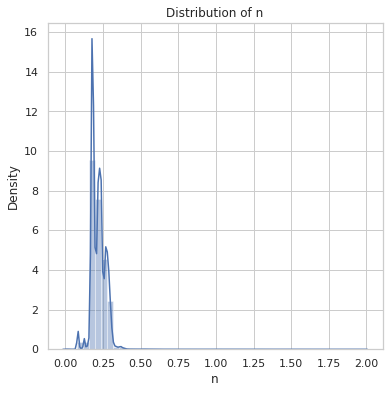

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['n'])
plt.xlabel("n")
plt.title("Distribution of n")
plt.show()

Text(0.5, 1.0, 'CDF plot of n')

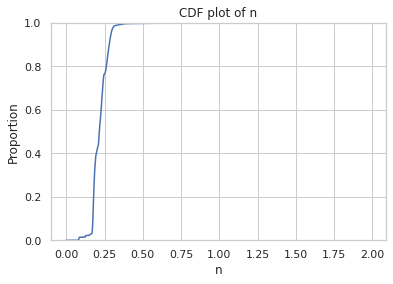

In [ ]:
sns.ecdfplot(data=X_train,x=X_train['n'])
plt.title('CDF plot of n')

In [ ]:
print("minimum value of n column is {}".format(min(X_train['n'])))
print("50 percentile of n column is {}".format(np.percentile(X_train['n'], 50))) 
print("95 percentile of n column is {}".format(np.percentile(X_train['n'], 90))) 
print("99 percentile of n column is {}".format(np.percentile(X_train['n'], 99))) 
print("maximum value of n column is {}".format(max(X_train['n']))) 



minimum value of n column is 0.00012839120584053
50 percentile of n column is 0.21593066290123558
95 percentile of n column is 0.28068578210866546
99 percentile of n column is 0.3353771941883027
maximum value of n column is 1.988876935803367


Distribution of n is positively skewed with 99 percentile of value lie below 0.335 while maximum value of n column in 1.98

Text(0.5, 1.0, 'Scatter plot between n and diameter of asteroid')

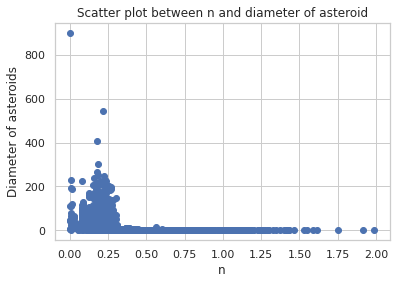

In [ ]:
#Checking relationship between n and diameter
plt.scatter(X_train['n'],Y_train)
plt.xlabel("n")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between n and diameter of asteroid")



In [ ]:
coef, p = spearmanr(X_train['n'], Y_train)
print(coef)

-0.5697192569459443


There seems to be negative correlation between n and diameter of asteroids with correlation value -0.56

<h3> per

In [ ]:
print("Number of missing values in per column in training dataset is {}".format(X_train['per'].isnull().sum()))
print("Number of missing values in per column in testing dataset is {}".format(X_test['per'].isnull().sum()))


Number of missing values in per column in training dataset is 0
Number of missing values in per column in testing dataset is 0


In [ ]:
X_train['per']=X_train['per'].astype('float')
Y_train=Y_train.astype('float')
X_test['per']=X_test['per'].astype('float')
Y_test=Y_test.astype('float')

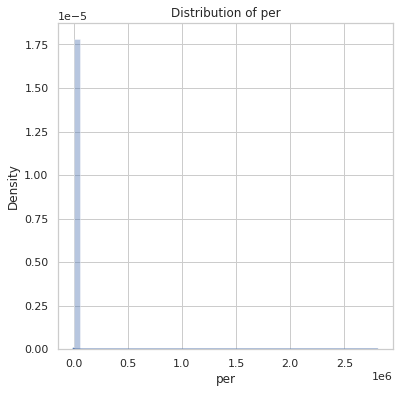

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['per'])
plt.xlabel("per")
plt.title("Distribution of per")
plt.show()

Text(0.5, 1.0, 'Box plot of per')

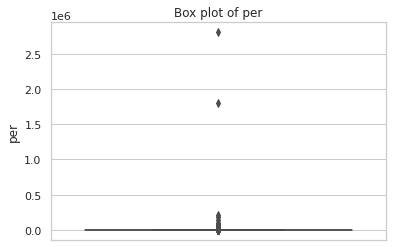

In [ ]:
sns.boxplot(data=X_train,y=X_train['per'])
plt.title('Box plot of per')

In [ ]:
print("minimum value of per is {}".format(min(X_train['per'])))
print("50 percentile of per is {}".format(np.percentile(X_train['per'], 50))) 
print("95 percentile of per is {}".format(np.percentile(X_train['per'], 90))) 
print("99 percentile of per is {}".format(np.percentile(X_train['per'], 99))) 
print("maximum value of per is {}".format(max(X_train['per']))) 



minimum value of per is 181.0066744298511
50 percentile of per is 1667.201846946868
95 percentile of per is 2069.6797153265943
99 percentile of per is 4308.64036505085
maximum value of per is 2803930.359896594


Distribution of per is highly positvely skewed which contains outliers we can observe 99 percentile is under 4308.64 while maximum value is 2803930.35

Text(0.5, 1.0, 'Scatter plot between per and diameter of asteroid')

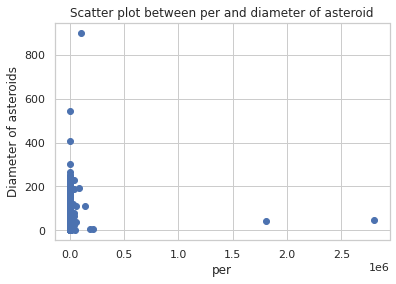

In [ ]:
#Checking relationship between per and diameter
plt.scatter(X_train['per'],Y_train)
plt.xlabel("per")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between per and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['per'], Y_train)
print(coef)

0.5697192569459443


There seems to positive correlation between per and asteroids diameter with positive correlation value 0.56

<h3> ma 

In [ ]:
print("Number of missing values in ma column in training dataset is {}".format(X_train['ma'].isnull().sum()))
print("Number of missing values in ma column in testing dataset is {}".format(X_test['ma'].isnull().sum()))



Number of missing values in ma column in training dataset is 0
Number of missing values in ma column in testing dataset is 0


In [ ]:
X_train['ma']=X_train['ma'].astype('float')
Y_train=Y_train.astype('float')
X_test['ma']=X_test['ma'].astype('float')
Y_test=Y_test.astype('float')


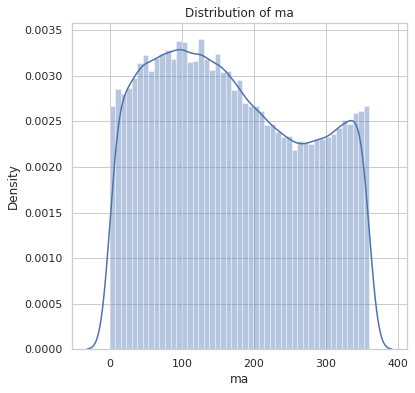

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['om'])
plt.xlabel("ma")
plt.title("Distribution of ma")
plt.show()

Distribution of ma column seems to be uniformly distributed.

In [ ]:
print("minimum value of ma column is {}".format(min(X_train['ma']))) 
print("50 percentile of ma column is {}".format(np.percentile(X_train['ma'], 50))) 
print("95 percentile of ma column is {}".format(np.percentile(X_train['ma'], 90))) 
print("99 percentile of ma column is {}".format(np.percentile(X_train['ma'], 99))) 
print("maximum value of ma column is {}".format(max(X_train['ma']))) 


minimum value of ma column is 0.00193035093993888
50 percentile of ma column is 186.8509386738742
95 percentile of ma column is 324.5293392127435
99 percentile of ma column is 356.3710684844592
maximum value of ma column is 359.9999791148726


Distribution of ma column doesn't seems to contain outliers which can be verified by seeing very little difference between 99 percentile and maximum value

<h3> Class

In [ ]:
print("Number of missing value in training dataset of class column is {}".format(X_train['class'].isnull().sum()))
print("Number of missing values in testing dataset of class column is {}".format(X_test['class'].isnull().sum()))

Number of missing value in training dataset of class column is 0
Number of missing values in testing dataset of class column is 0


In [ ]:
X_train['class'].value_counts()

MBA    84613
OMB     5102
TJN     1279
IMB      372
APO      317
MCA      243
AMO      181
ATE       65
CEN       31
TNO        8
AST        5
Name: class, dtype: int64

In [ ]:
temp=list(sorted(X_train.groupby('class').size(),reverse=True))
temp_df={'class':[],'count':[]}
for index,value in enumerate(temp) :
  temp_df['count'].append(value)
temp_df['class'].extend(['MBA','OMB','TJN','IMB','APO','MCA','AMO','ATE','CEN','TNO','AST'])
temp_df=pd.DataFrame(temp_df)
temp_df.columns=['class','count']

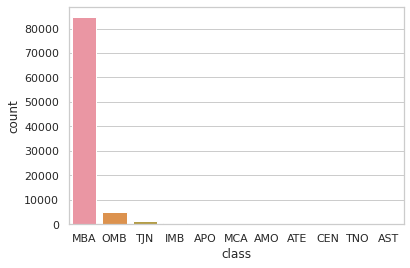

In [ ]:
sns.barplot(x="class", y="count", data=temp_df)

In [ ]:
print("Fraction of MBA class are {}".format((84613)/(X_train.shape[0])))

Fraction of MBA class are 0.9175522685867962


Class column are highly imbalanced with 91 percent of data comes under MBA class and 9 percent of data is distributed among 10 columns

No handles with labels found to put in legend.


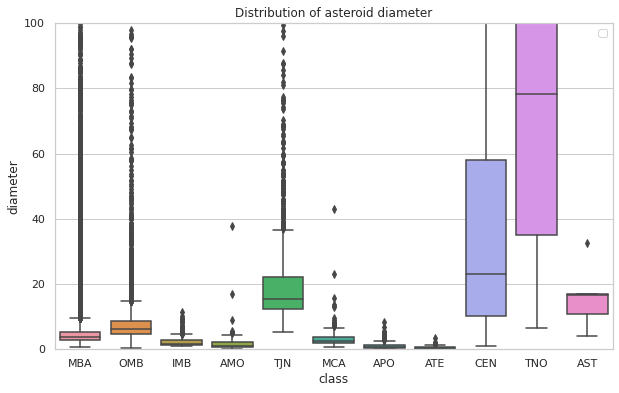

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=temp_hist,x='class',y='diameter')
plt.title("Distribution of asteroid diameter")
plt.ylim((0,100))
plt.legend()
plt.show()

Distribution of diameter of asteroids for different classes are not exactly overlapping with each other and can be useful in determining diameter of asteroids

<h3> Feature Engineering

I found an interesting formula on one of the NASA website(https://cneos.jpl.nasa.gov/tools/ast_size_est.html) to determine asteroid diameter using absolute magnitude(H) and geometric albedo(a) <br>
$d = 10^{[ 3.1236 - 0.5 log10(a) - 0.2H ]}$

In [ ]:
#Function to estimate asteroid parameter 
import math
def est_diameter(a,h) :
  r=(3.1236-(0.5*math.log10(a))-(0.2*h))
  d=math.pow(10,r)
  return d
  

In [ ]:
for index,value in X_train.iterrows() :
  a=value['albedo']
  h=value['H']
  X_train.at[index,'estimate_diameter']=est_diameter(a,h)


In [ ]:
for index,value in X_test.iterrows() :
  a=value['albedo']
  h=value['H']
  X_test.at[index,'estimate_diameter']=est_diameter(a,h)

<h3> Correlation Heatmap

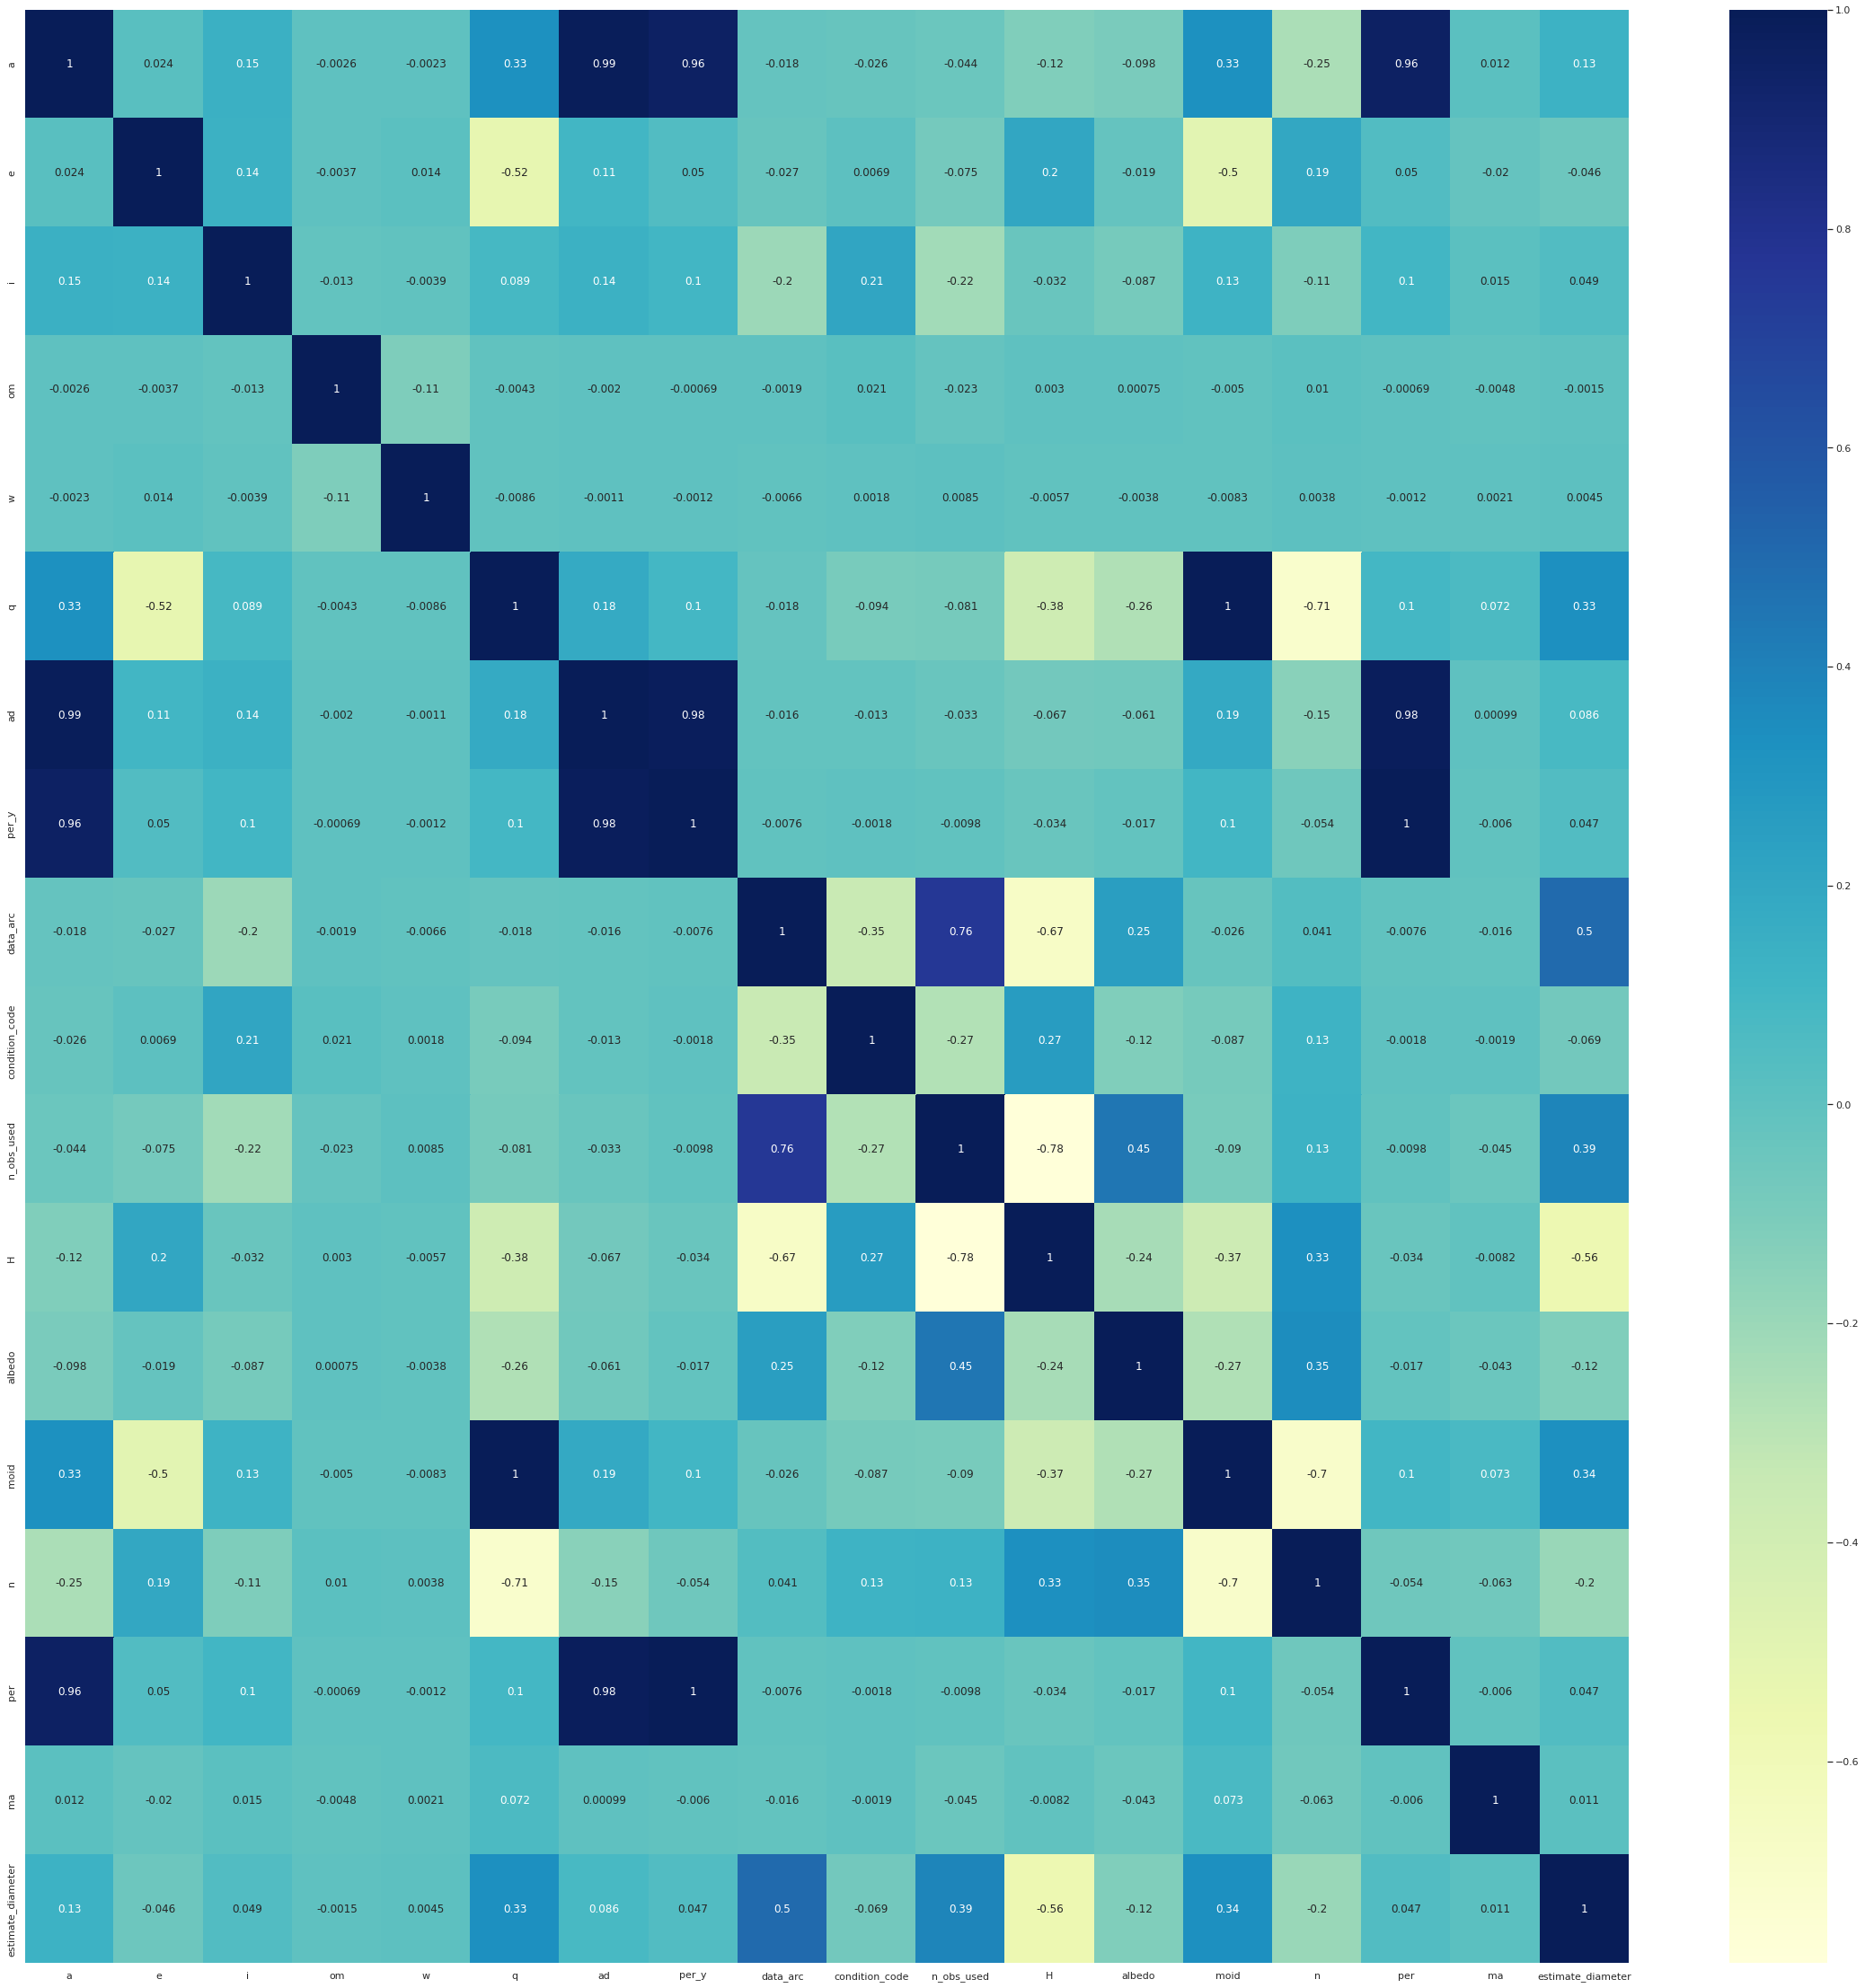

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)

This is correlation heatmap dark blue colour suggest very high correlation between feature . If we talk in number close to 1 suggest very high correlation . There seems to be very less correlation between input features.

In [ ]:
X_train.head(5)

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,H,neo,pha,albedo,moid,class,n,per,ma,estimate_diameter
54319,3.109871,0.192123,0.640855,152.162308,251.971646,2.512393,3.707348,5.484306,9330.0,0,...,14.5,N,N,0.039,1.52106,MBA,0.179718,2003.142718,350.610360,8.473595
155115,3.153208,0.234111,8.959962,342.058849,68.396293,2.415008,3.891407,5.599343,21411.0,0,...,15.6,N,N,0.034,1.44203,MBA,0.176025,2045.160166,139.043944,5.468403
79928,3.043164,0.164736,2.860792,126.445436,81.507194,2.541846,3.544482,5.308798,14445.0,0,...,14.9,N,N,0.070,1.53943,MBA,0.185659,1939.038567,254.520701,5.260790
282899,2.665060,0.122798,14.095948,221.504520,332.693249,2.337796,2.992324,4.350797,9016.0,0,...,15.7,N,N,0.090,1.34316,MBA,0.226539,1589.128442,287.809809,3.209806
410659,3.223407,0.420765,21.495786,306.500860,81.218790,1.867109,4.579705,5.787365,4907.0,0,...,16.3,N,N,0.043,1.00058,OMB,0.170307,2113.835232,291.154937,3.522620


In [ ]:
X_train.columns

Index(['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'albedo', 'moid',
       'class', 'n', 'per', 'ma', 'estimate_diameter'],
      dtype='object')

<h3> Standardize Numerical columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#Separating categorical data 
X_train_temp=X_train.loc[:,['condition_code','neo','pha','class']]
X_train_numerical=X_train.drop(['condition_code','neo','pha','class'],axis=1)

In [ ]:
X_train_numerical.head(1)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,n,per,ma,estimate_diameter
54319,3.109871,0.192123,0.640855,152.162308,251.971646,2.512393,3.707348,5.484306,9330.0,885,14.5,0.039,1.52106,0.179718,2003.142718,350.61036,8.473595


In [ ]:
X_test_temp=X_test.loc[:,['condition_code','neo','pha','class']]
X_test_numerical=X_test.drop(['condition_code','neo','pha','class'],axis=1)

In [ ]:
#Saving column name for future purpose
train_column=list(X_train_numerical.columns)
test_column=list(X_test_numerical.columns)

In [ ]:
print(train_column)

['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'albedo', 'moid', 'n', 'per', 'ma', 'estimate_diameter']


In [ ]:
scaler = StandardScaler()
X_train_numerical=scaler.fit_transform(X_train_numerical)
X_test_numerical=scaler.transform(X_test_numerical)

In [ ]:
#Saving standard scaler for our query point 
from joblib import dump
dump(scaler, 'final_standardscaler.joblib')

['final_standardscaler.joblib']

<h3> Handling Categorical Columns

Machine learning algorith work on numerical data they don't work on text data so we need to convert categorical data into numerical . For these there are many process one-hot encoding , response coding etc . I will do for now one hote encoding and then experiment with different methods

In [ ]:
X_train_temp.head(1)

,condition_code,neo,pha,class
54319,0,N,N,MBA


In [ ]:
#Excluding condition code as it has been alraedy in numerical form
X_train_temp = pd.get_dummies(X_train_temp, columns = ['neo', 'pha','class'])
X_test_temp = pd.get_dummies(X_test_temp, columns = ['neo', 'pha','class'])

In [ ]:
train_column=list(train_column)+list(X_train_temp.columns)
test_column=list(test_column)+list(X_test_temp.columns)

In [ ]:
X_train_temp=np.array(X_train_temp)
X_test_temp=np.array(X_test_temp)

In [ ]:
#Combining both numerical and categorical transformation 
X_train=pd.DataFrame(np.concatenate([X_train_numerical,X_train_temp],axis=1))
X_test=pd.DataFrame(np.concatenate([X_test_numerical,X_test_temp],axis=1))

In [ ]:
X_train.columns=train_column
X_test.columns=test_column

In [ ]:
print(train_column)

['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'albedo', 'moid', 'n', 'per', 'ma', 'estimate_diameter', 'condition_code', 'neo_N', 'neo_Y', 'pha_N', 'pha_Y', 'class_AMO', 'class_APO', 'class_AST', 'class_ATE', 'class_CEN', 'class_IMB', 'class_MBA', 'class_MCA', 'class_OMB', 'class_TJN', 'class_TNO']


<h3> MODEL PERTURBATION TEST

In [ ]:
#Weights of Ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#Grid search for finding best coefficient for regualrization
parameters={'alpha':[0.0001,0.001,0.1,1,10,100,1000]}
rid=Ridge()
clf=GridSearchCV(rid,parameters)
clf.fit(X_train.values,Y_train.values)
print("Best paramater values are {}".format(clf.best_params_))

Best paramater values are {'alpha': 100}


In [ ]:
#Now let's fit a model with best parameters
rid=Ridge(alpha=100)
rid.fit(X_train.values,Y_train.values)

Ridge(alpha=100)

In [ ]:
#Weights without any addition of noise
W=rid.coef_

In [ ]:
#Let's add little noise to the data 
X_noise=X_train.values + 0.00005

In [ ]:
#Now let's fit a model with noise addition data
rid_noise=Ridge(alpha=100)
rid_noise.fit(X_noise,Y_train.values)

Ridge(alpha=100)

In [ ]:
W_noise=rid_noise.coef_

In [ ]:
#Change in weights
change = abs((W[0] - W_noise[0])/(W[0]))
percentage_change=change*100

In [ ]:
print(percentage_change)

[6.34099394e-10 9.59070819e-12 5.56235650e-12 8.13746583e-13
 8.77650808e-13 2.00244102e-10 2.36181407e-10 6.35725366e-10
 1.15478983e-12 1.03710513e-11 1.68811109e-12 7.79245891e-12
 6.02237571e-11 8.99716022e-12 7.66328344e-10 2.00207643e-12
 0.00000000e+00 8.96497522e-13 3.62266115e-12 5.28103492e-12
 3.28576894e-13 9.01886923e-12 5.64506978e-12 3.08732939e-11
 3.30134496e-12 2.39090880e-12 1.57801176e-12 3.39248083e-11
 1.11125339e-10 1.13604689e-11 2.10452784e-11 7.14728395e-12
 8.81910818e-12]


There seems to be no multicollinearity withing input features which can be seen as there is almost no change in weights even after adding small noise to data

<h3> OUTLIER REMOVAL

There seems to be so many outliers in this dataset as we saw so many positively skewed distribution . There are many methods to distinguish outlier RANSAC is one of them we will implement it after model building.

<h3> MACHINE LEARNING MODELS

<h3> RANDOM MODEL

In [ ]:
#I will build a random model which i treat as a baseline model every other sophisticated model should perform better than this random model 
#I will build random model where y_pred will be mean of y_actual only
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mean_y_train=np.mean(Y_train['diameter'])
y_train_pred=np.full((1,X_train.shape[0]),mean_y_train)[0]
y_train=Y_train['diameter'].values
print("Mean squared error for training dataset for random model is {}".format(mean_squared_error(y_train,y_train_pred)))
print("R2 score for training dataset for random model is {}".format(r2_score(y_train,y_train_pred)))

Mean squared error for training dataset for random model is 82.181428169367
R2 score for training dataset for random model is 1.1102230246251565e-16


In [ ]:
y_test_pred=np.full((1,X_test.shape[0]),mean_y_train)[0]
y_test=Y_test['diameter'].values
print("Mean squared error for testing dataset for random model is {}".format(mean_squared_error(y_test,y_test_pred)))
print("R2 score for testing dataset for random model is {}".format(r2_score(y_test,y_test_pred)))

Mean squared error for testing dataset for random model is 100.09054668886617
R2 score for testing dataset for random model is -7.405887870293171e-06


<h3> Linear Regression with L2 Regularization (Ridge Regression)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#Grid search for finding best coefficient for regualrization
parameters={'alpha':[0.0001,0.001,0.1,1,10,100,1000]}
rid=Ridge()
clf=GridSearchCV(rid,parameters)
clf.fit(X_train.values,Y_train.values)
print("Best paramater values are {}".format(clf.best_params_))

Best paramater values are {'alpha': 100}


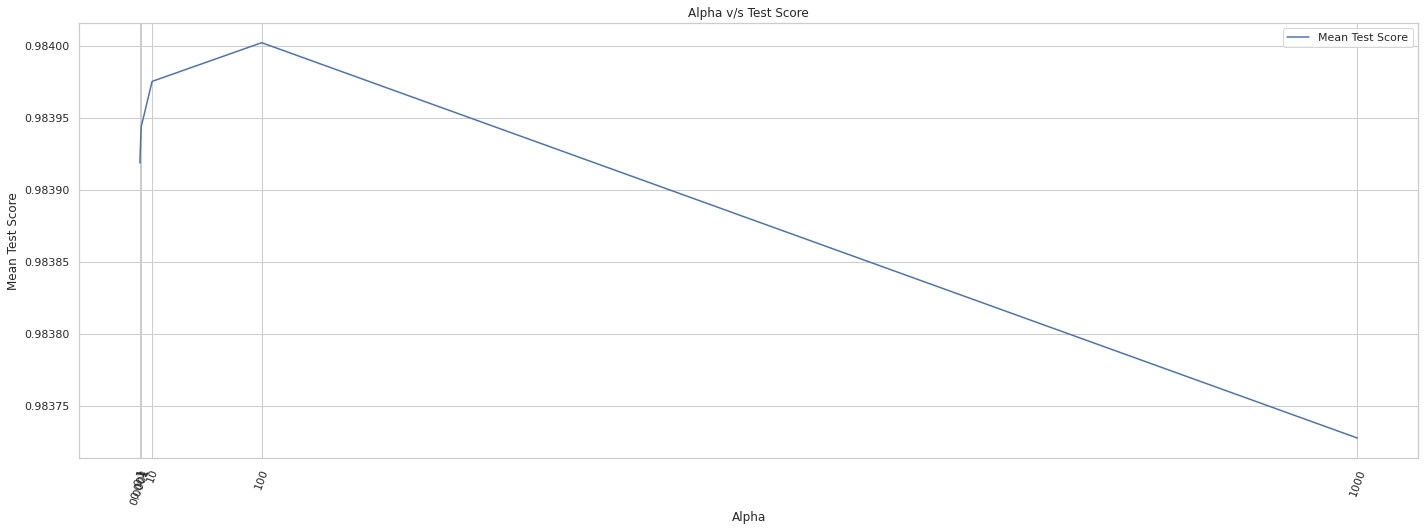

In [ ]:
#Alpha vs test score 
test_score=[]
plt.figure(figsize=(24,8))
test_score.extend(list(clf.cv_results_['mean_test_score']))
alpha=[0.0001,0.001,0.1,1,10,100,1000]
plt.plot(alpha,test_score,label='Mean Test Score')
labels=['0.0001','0.001','0.1','1','10','100','1000']
plt.xticks(alpha, labels, rotation =70)
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Mean Test Score")
plt.title("Alpha v/s Test Score")
plt.show()

In [ ]:
#Now let's fit a model with best parameters
rid=Ridge(alpha=100)
rid.fit(X_train.values,Y_train.values)
y_train_pred=rid.predict(X_train.values)
y_train_pred=y_train_pred.ravel()
y_train=Y_train.values.ravel()
print("Mean squared error for training dataset for linear regression model is {}".format(mean_squared_error(y_train,y_train_pred)))
print("R2 score for training dataset for linear regression model is {}".format(r2_score(y_train,y_train_pred)))

Mean squared error for training dataset for linear regression model is 1.275810106203308
R2 score for training dataset for linear regression model is 0.9844756883078984


In [ ]:
y_test_pred=rid.predict(X_test.values)
y_test_pred=y_test_pred.ravel()
y_test=Y_test.values.ravel()
print("Mean squared error for testing dataset for linear regression model is {}".format(mean_squared_error(y_test,y_test_pred)))
print("R2 score for testing dataset for linear regression model is {}".format(r2_score(y_test,y_test_pred)))

Mean squared error for testing dataset for linear regression model is 1.6208069103219875
R2 score for testing dataset for linear regression model is 0.9838064735636366


As there is almost no multicollinearity between input features absolute value of weeights can be treated as feature importance for estimating asteroids diameter .

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

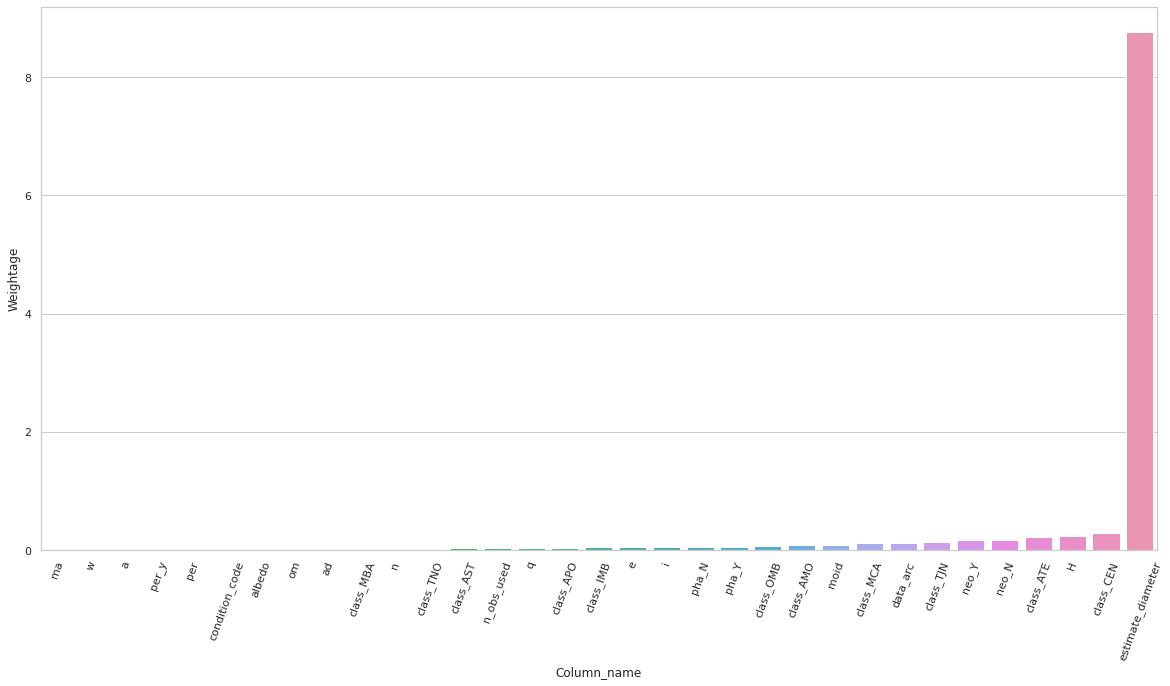

In [ ]:
column_name=X_train.columns
coef=abs(rid.coef_[0])
plt.figure(figsize=(20,10))
temp_dict={'Column_name':[],'Weightage':[]}
temp_dict['Column_name'].extend(column_name)
temp_dict['Weightage'].extend(list(coef))
temp_df=pd.DataFrame(temp_dict)
temp_df=temp_df.sort_values(by='Weightage')
sns.barplot(data=temp_df,x='Column_name',y='Weightage')
plt.xticks(rotation=70)

Estimate dimater comes out to be best feature in predicting diameter of asteroids . That's why coming up with some feature with help of domain knowledge is very very important

<h3> K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
#Grid search for finding best value of number of nearest neighbors
parameters={'n_neighbors':[5,10,20,30,50,100]}
knn=KNeighborsRegressor()
clf=GridSearchCV(knn,parameters)
clf.fit(X_train.values,Y_train.values)
print("Best paramater values are {}".format(clf.best_params_))

Best paramater values are {'n_neighbors': 5}


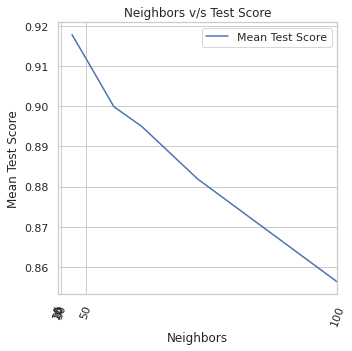

In [ ]:
#Neighbors vs test score 
test_score=[]
plt.figure(figsize=(5,5))
test_score.extend(list(clf.cv_results_['mean_test_score']))
neighbors=[5,10,20,30,50,100]
plt.plot(neighbors,test_score,label='Mean Test Score')
labels=['5','10','20','30','50','100']
plt.xticks(alpha, labels, rotation =70)
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("Mean Test Score")
plt.xlim([0,100])
plt.title("Neighbors v/s Test Score")
plt.show()

In [ ]:
#Now let's fit a model with best parameters
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train.values,Y_train.values)
y_train_pred=knn.predict(X_train.values)
y_train_pred=y_train_pred.ravel()
y_train=Y_train.values.ravel()
print("Mean squared error for training dataset for knn model is {}".format(mean_squared_error(y_train,y_train_pred)))
print("R2 score for training dataset for knn model is {}".format(r2_score(y_train,y_train_pred)))

Mean squared error for training dataset for knn model is 5.726194056767263
R2 score for training dataset for knn model is 0.9303225292584816


In [ ]:
y_test_pred=knn.predict(X_test.values)
y_test_pred=y_test_pred.ravel()
y_test=Y_test.values.ravel()
print("Mean squared error for testing dataset for knn model is {}".format(mean_squared_error(y_test,y_test_pred)))
print("R2 score for testing dataset for knn model is {}".format(r2_score(y_test,y_test_pred)))

Mean squared error for testing dataset for knn model is 11.387291808672833
R2 score for testing dataset for knn model is 0.8862292542264052


<h3> RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
#Grid search for finding best value of number of tree ,  min_split and min_samples_leaf
parameters={'n_estimators':[10,20,20,40,50], 'min_samples_split':[2,5,10,15,20] , 'min_samples_leaf' :[1,5,10,15,20]}
rff=RandomForestRegressor()
clf=RandomizedSearchCV(rff,parameters)
clf.fit(X_train.values,Y_train.values)
print("Best paramater values are {}".format(clf.best_params_))

In [ ]:
#Now let's fit a model with best parameters
from sklearn.ensemble import RandomForestRegressor
rff=RandomForestRegressor(n_estimators=10,min_samples_split=2,min_samples_leaf=1)
rff.fit(X_train.values,Y_train.values)
y_train_pred=rff.predict(X_train.values)
y_train_pred=y_train_pred.ravel()
y_train=Y_train.values.ravel()
print("Mean squared error for training dataset for Random Forest model is {}".format(mean_squared_error(y_train,y_train_pred)))
print("R2 score for training dataset for Random Forest model is {}".format(r2_score(y_train,y_train_pred)))

Mean squared error for training dataset for Random Forest model is 1.4408643573375823
R2 score for training dataset for Random Forest model is 0.9824672752782038


In [ ]:
y_test_pred=rff.predict(X_test.values)
y_test_pred=y_test_pred.ravel()
y_test=Y_test.values.ravel()
print("Mean squared error for testing dataset for Random Forest model is {}".format(mean_squared_error(y_test,y_test_pred)))
print("R2 score for testing dataset for Random Forest model is {}".format(r2_score(y_test,y_test_pred)))

Mean squared error for testing dataset for Random Forest model is 7.859867070942812
R2 score for testing dataset for Random Forest model is 0.9214718518356206


<h4> I will not go with complex model(GBDT,Ensemble models) because their time and space complexity is very high if we compare it with simple linear regression model and in linear regression model we already got R2 score value 0.9837 which can have maximum value of 1 . So we already got excellent model no need of going into complex models

<h3> ANALYZING OUR FINAL MODEL

So we finalize Linear regression with L2 regularization ( Ridge regression ) as our final model but do we need all the features we already got feature importances i will try to remove features with less importance and see how it effects metrics of models

In [ ]:
#Removing five least import features
import_feat=temp_df['Column_name'][5:]
X_train=X_train[import_feat]

In [ ]:
X_train.head()

,condition_code,albedo,om,ad,class_MBA,n,class_TNO,class_AST,n_obs_used,q,...,moid,class_MCA,data_arc,class_TJN,neo_Y,neo_N,class_ATE,H,class_CEN,estimate_diameter
0,0.0,-0.832697,-0.172264,0.145296,1.0,-0.702281,0.0,0.0,0.354481,0.211963,...,0.196105,0.0,0.060454,0.0,0.0,1.0,0.0,-0.485322,0.0,0.343175
1,0.0,-0.878458,1.678685,0.201230,1.0,-0.767509,0.0,0.0,-0.604254,0.022231,...,0.040912,0.0,2.025087,0.0,0.0,1.0,0.0,0.297844,0.0,0.020477
2,0.0,-0.548977,-0.422930,0.095803,1.0,-0.597318,0.0,0.0,-0.281877,0.269345,...,0.232179,0.0,0.892264,0.0,0.0,1.0,0.0,-0.200534,0.0,-0.001817
3,0.0,-0.365931,0.503624,-0.071993,1.0,0.124879,0.0,0.0,-0.683169,-0.128199,...,-0.153242,0.0,0.009391,0.0,0.0,1.0,0.0,0.369041,0.0,-0.222052
4,0.0,-0.796088,1.332096,0.410398,0.0,-0.868538,0.0,0.0,-0.956853,-1.045227,...,-0.825976,0.0,-0.658821,0.0,0.0,1.0,0.0,0.796223,0.0,-0.188462


In [ ]:
print(X_train.columns)

Index(['condition_code', 'albedo', 'om', 'ad', 'class_MBA', 'n', 'class_TNO',
       'class_AST', 'n_obs_used', 'q', 'class_APO', 'class_IMB', 'e', 'i',
       'pha_N', 'pha_Y', 'class_OMB', 'class_AMO', 'moid', 'class_MCA',
       'data_arc', 'class_TJN', 'neo_Y', 'neo_N', 'class_ATE', 'H',
       'class_CEN', 'estimate_diameter'],
      dtype='object')


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#Grid search for finding best coefficient for regualrization
parameters={'alpha':[0.0001,0.001,0.1,1,10,100,1000]}
rid=Ridge()
clf=GridSearchCV(rid,parameters)
clf.fit(X_train.values,Y_train.values)
print("Best paramater values are {}".format(clf.best_params_))

Best paramater values are {'alpha': 100}


In [ ]:
#Now let's fit a model with best parameters
rid=Ridge(alpha=100)
rid.fit(X_train.values,Y_train.values)
y_train_pred=rid.predict(X_train.values)
y_train_pred=y_train_pred.ravel()
y_train=Y_train.values.ravel()
print("Mean squared error for training dataset for linear regression model is {}".format(mean_squared_error(y_train,y_train_pred)))
print("R2 score for training dataset for linear regression model is {}".format(r2_score(y_train,y_train_pred)))

Mean squared error for training dataset for linear regression model is 1.275933789370706
R2 score for training dataset for linear regression model is 0.9844741833064625


In [ ]:
X_test=X_test[import_feat]

In [ ]:
y_test_pred=rid.predict(X_test.values)
y_test_pred=y_test_pred.ravel()
y_test=Y_test.values.ravel()
print("Mean squared error for testing dataset for linear regression model is {}".format(mean_squared_error(y_test,y_test_pred)))
print("R2 score for testing dataset for linear regression model is {}".format(r2_score(y_test,y_test_pred)))

Mean squared error for testing dataset for linear regression model is 1.6158698272118603
R2 score for testing dataset for linear regression model is 0.9838558000968302


Our R2 score doesn't decreases so we can remove this 5 features it doesn't make any difference :)

In [ ]:
print("Column in traning dataset are {}".format(list(X_train.columns)))

Column in traning dataset are ['condition_code', 'albedo', 'om', 'ad', 'class_MBA', 'n', 'class_TNO', 'class_AST', 'n_obs_used', 'q', 'class_APO', 'class_IMB', 'e', 'i', 'pha_N', 'pha_Y', 'class_OMB', 'class_AMO', 'moid', 'class_MCA', 'data_arc', 'class_TJN', 'neo_Y', 'neo_N', 'class_ATE', 'H', 'class_CEN', 'estimate_diameter']


ma , per and n are three columns for which i searched what it represents but didn't find anything significant out of which we already eliminate ma and per as their weights are very low . Can we drop n as well let's see performance of our final model . Another thing which i will like to talk is a column called n_obs_used this doesn't make sense for end user let's drop n and n_obs_used and let's see performance of our final model

In [ ]:
X_train=X_train.drop(['n','n_obs_used'],axis=1)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#Grid search for finding best coefficient for regualrization
parameters={'alpha':[0.0001,0.001,0.1,1,10,100,1000]}
rid=Ridge()
clf=GridSearchCV(rid,parameters)
clf.fit(X_train.values,Y_train.values)
print("Best paramater values are {}".format(clf.best_params_))

Best paramater values are {'alpha': 100}


In [ ]:
#Now let's fit a model with best parameters
rid=Ridge(alpha=100)
rid.fit(X_train.values,Y_train.values)
y_train_pred=rid.predict(X_train.values)
y_train_pred=y_train_pred.ravel()
y_train=Y_train.values.ravel()
print("Mean squared error for training dataset for linear regression model is {}".format(mean_squared_error(y_train,y_train_pred)))
print("R2 score for training dataset for linear regression model is {}".format(r2_score(y_train,y_train_pred)))

Mean squared error for training dataset for linear regression model is 1.276374048959274
R2 score for training dataset for linear regression model is 0.9844688261400276


In [ ]:
X_test=X_test.drop(['n','n_obs_used'],axis=1)

In [ ]:
y_test_pred=rid.predict(X_test.values)
y_test_pred=y_test_pred.ravel()
y_test=Y_test.values.ravel()
print("Mean squared error for testing dataset for linear regression model is {}".format(mean_squared_error(y_test,y_test_pred)))
print("R2 score for testing dataset for linear regression model is {}".format(r2_score(y_test,y_test_pred)))

Mean squared error for testing dataset for linear regression model is 1.6176334458832462
R2 score for testing dataset for linear regression model is 0.9838381797341597


In [ ]:
#saving our final model
import pickle
pickle.dump(rid, open('final_model.pkl', 'wb'))

Removing 5 least important features plus n and n_obs used column doesn't effect too much in our mean squared error and r2 score .

We see our best feature comes out to be estimate_diameter which we enginnered through domain knowledge . Let's see if we remove this feature how will it impact our performance

In [ ]:
X_train.head()

,condition_code,albedo,om,ad,class_MBA,class_TNO,class_AST,q,class_APO,class_IMB,...,moid,class_MCA,data_arc,class_TJN,neo_Y,neo_N,class_ATE,H,class_CEN,estimate_diameter
0,0.0,-0.832697,-0.172264,0.145296,1.0,0.0,0.0,0.211963,0.0,0.0,...,0.196105,0.0,0.060454,0.0,0.0,1.0,0.0,-0.485322,0.0,0.343175
1,0.0,-0.878458,1.678685,0.201230,1.0,0.0,0.0,0.022231,0.0,0.0,...,0.040912,0.0,2.025087,0.0,0.0,1.0,0.0,0.297844,0.0,0.020477
2,0.0,-0.548977,-0.422930,0.095803,1.0,0.0,0.0,0.269345,0.0,0.0,...,0.232179,0.0,0.892264,0.0,0.0,1.0,0.0,-0.200534,0.0,-0.001817
3,0.0,-0.365931,0.503624,-0.071993,1.0,0.0,0.0,-0.128199,0.0,0.0,...,-0.153242,0.0,0.009391,0.0,0.0,1.0,0.0,0.369041,0.0,-0.222052
4,0.0,-0.796088,1.332096,0.410398,0.0,0.0,0.0,-1.045227,0.0,0.0,...,-0.825976,0.0,-0.658821,0.0,0.0,1.0,0.0,0.796223,0.0,-0.188462


In [ ]:
X_train_temp=X_train.drop(['estimate_diameter'],axis=1)

In [ ]:
#Now let's fit our final model with best parameter and without estimate diameter
rid=Ridge(alpha=100)
rid.fit(X_train_temp.values,Y_train.values)
y_train_pred=rid.predict(X_train_temp.values)
y_train_pred=y_train_pred.ravel()
y_train=Y_train.values.ravel()
print("Mean squared error for training dataset for linear regression model is {}".format(mean_squared_error(y_train,y_train_pred)))
print("R2 score for training dataset for linear regression model is {}".format(r2_score(y_train,y_train_pred)))

Mean squared error for training dataset for linear regression model is 40.866238320325266
R2 score for training dataset for linear regression model is 0.5027314658476805


In [ ]:
X_test_temp=X_test.drop(['estimate_diameter'],axis=1)

In [ ]:
y_test_pred=rid.predict(X_test_temp.values)
y_test_pred=y_test_pred.ravel()
y_test=Y_test.values.ravel()
print("Mean squared error for testing dataset for linear regression model is {}".format(mean_squared_error(y_test,y_test_pred)))
print("R2 score for testing dataset for linear regression model is {}".format(r2_score(y_test,y_test_pred)))

Mean squared error for testing dataset for linear regression model is 58.7096814582927
R2 score for testing dataset for linear regression model is 0.41342995719553544


<h5> Our model performance become almost half after dropping only one column estimate diameter that also was not initially present in the dataset but we created this feature . That's why feature engineering and feature transformation are most important part of classical machine learning.